# Volume Profile Visible Range
> An indicator to visualise price entries 

- toc: false
- badges: false
- comments: true
- categories: [Finance, Blockchain]
- image: images/chart-preview.png

In [1]:
#hide
#@title Imports

import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go
import requests
import datetime

import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns
import random
sns.set()
# !pip install mplfinance
# More Plotting libaries 
# from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num
from dateutil.relativedelta import relativedelta


# !pip uninstall yfinance
# !pip uninstall pandas-datareader
# !pip install yfinance --upgrade --no-cache-dir
# !pip install pandas-datareader
import yfinance as yf

In [2]:
#hide
#@title plot
def plot(tick,p=182,kk=False):
  """
  Give a ticker and period in days, the VPVR is plotted and resistant lines are shown
  """

  ### Data functions
  if (kk==False):
    ticker = yf.Ticker(tick)
    df = ticker.history(period=f'{p}d',interval='1d')
    cp = df.Close[len(df)-1]
  elif (kk==True):
    link = f'https://openapi-v2.kucoin.com/api/v1/market/candles?type=1day&symbol={tick}'
    r = requests.get(link)	
    df = pd.DataFrame.from_records(r.json()['data'])
    df.columns = ['Time', 'Open', 'Close', 'High', 'Low', 'Volume', 'Turnover']
    df['Time'] = pd.to_datetime(df['Time'], unit='s', errors='coerce')
    df = df.set_index('Time')
    df = df.head(p) 
    for col in df.columns:
      df[col] = pd.to_numeric(df[col])
    cp = df.Close[0]


  ### Density functions 
  kde_factor = 0.1
  num_samples = 500
  kde = stats.gaussian_kde(df['Close'],weights=df['Volume'],bw_method=kde_factor)
  xr = np.linspace(df['Close'].min(),df['Close'].max(),num_samples)
  kdy = kde(xr)
  ticks_per_sample = (xr.max() - xr.min()) / num_samples

  peaks,peak_props = signal.find_peaks(kdy)
  pkx1 = xr[peaks]
  pky1 = kdy[peaks]


  min_prom = 0
  peaks,peak_props = signal.find_peaks(kdy, prominence=min_prom)
  pkx = xr[peaks]
  pky = kdy[peaks]


  left_base = peak_props['left_bases']
  right_base = peak_props['right_bases']
  line_x = pkx
  line_y0 = pky
  line_y1 = pky - peak_props['prominences']

  ### Plotting functions 
  sns.set_style("whitegrid")
  plt.style.use('seaborn-dark-palette')


  f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5),gridspec_kw={'width_ratios': [1, 2.5]}, dpi= 300, 
                               facecolor='w', edgecolor='k', sharey=True)
  
  ax1.scatter(pky1,pkx1,marker='>',color='#06d6a0', zorder=10)
  ax1.plot(kdy,xr,color='#d62828')
  ax1.hist(df['Close'],weights=df['Volume'],  bins=50, density=True, 
           orientation='horizontal', alpha = 0.1)
  # print('='*50)
  # print(f'{tick}')
  proms = []
  for x, y0, y1 in zip(pkx, pky, line_y1):
    ax1.hlines(x,y0,y1, color='#06d6a0', alpha=1)   
    proms.append([x,y0-y1])
  #   print(f'This prominance level at {round(x,2)}:{round(prom,2)}') 
  # print('='*50)
  
  #determine the strongest support
  proms = pd.DataFrame.from_records(proms)
  print()
  proms.columns  = ['p','pp']
  sp = proms[proms['pp'] == proms['pp'].max()]['p'].reset_index()
  print(tick,' | % distance from strongest support: ', round(100*((sp['p'][0]-cp)/cp),2))


  # make the lines for the plot
  nn = pky - line_y1
  normalized_y1 = nn / np.sqrt(np.sum(nn**2))
  for i, txt in enumerate(pkx1):
    ax2.annotate(round(txt,2), (df.index[0], pkx1[i]))
  for x,a in zip(pkx,normalized_y1) :
    ax2.plot(df.index, [x]*len(df.index), color='#06d6a0', alpha= a) #change this normalised if you want gradients
  ax2.plot(df.index, df['Close'], alpha = 1)

  ax1.set_title(f'{tick} Volume Profile Visible Range (p={p}d)')
  ax2.set_title(f'{tick} Price')
  ax2.set_xlabel('Date')
  ax1.set_xlabel('Volume profile (partial sums)')
  ax1.set_ylabel('Price $')



BTC-USD  | % distance from strongest support:  -31.57

ETH-USD  | % distance from strongest support:  -53.35

ADA-USD  | % distance from strongest support:  -54.25

SOL1-USD  | % distance from strongest support:  -79.84

MATIC-USD  | % distance from strongest support:  5.56

LINK-USD  | % distance from strongest support:  -26.58


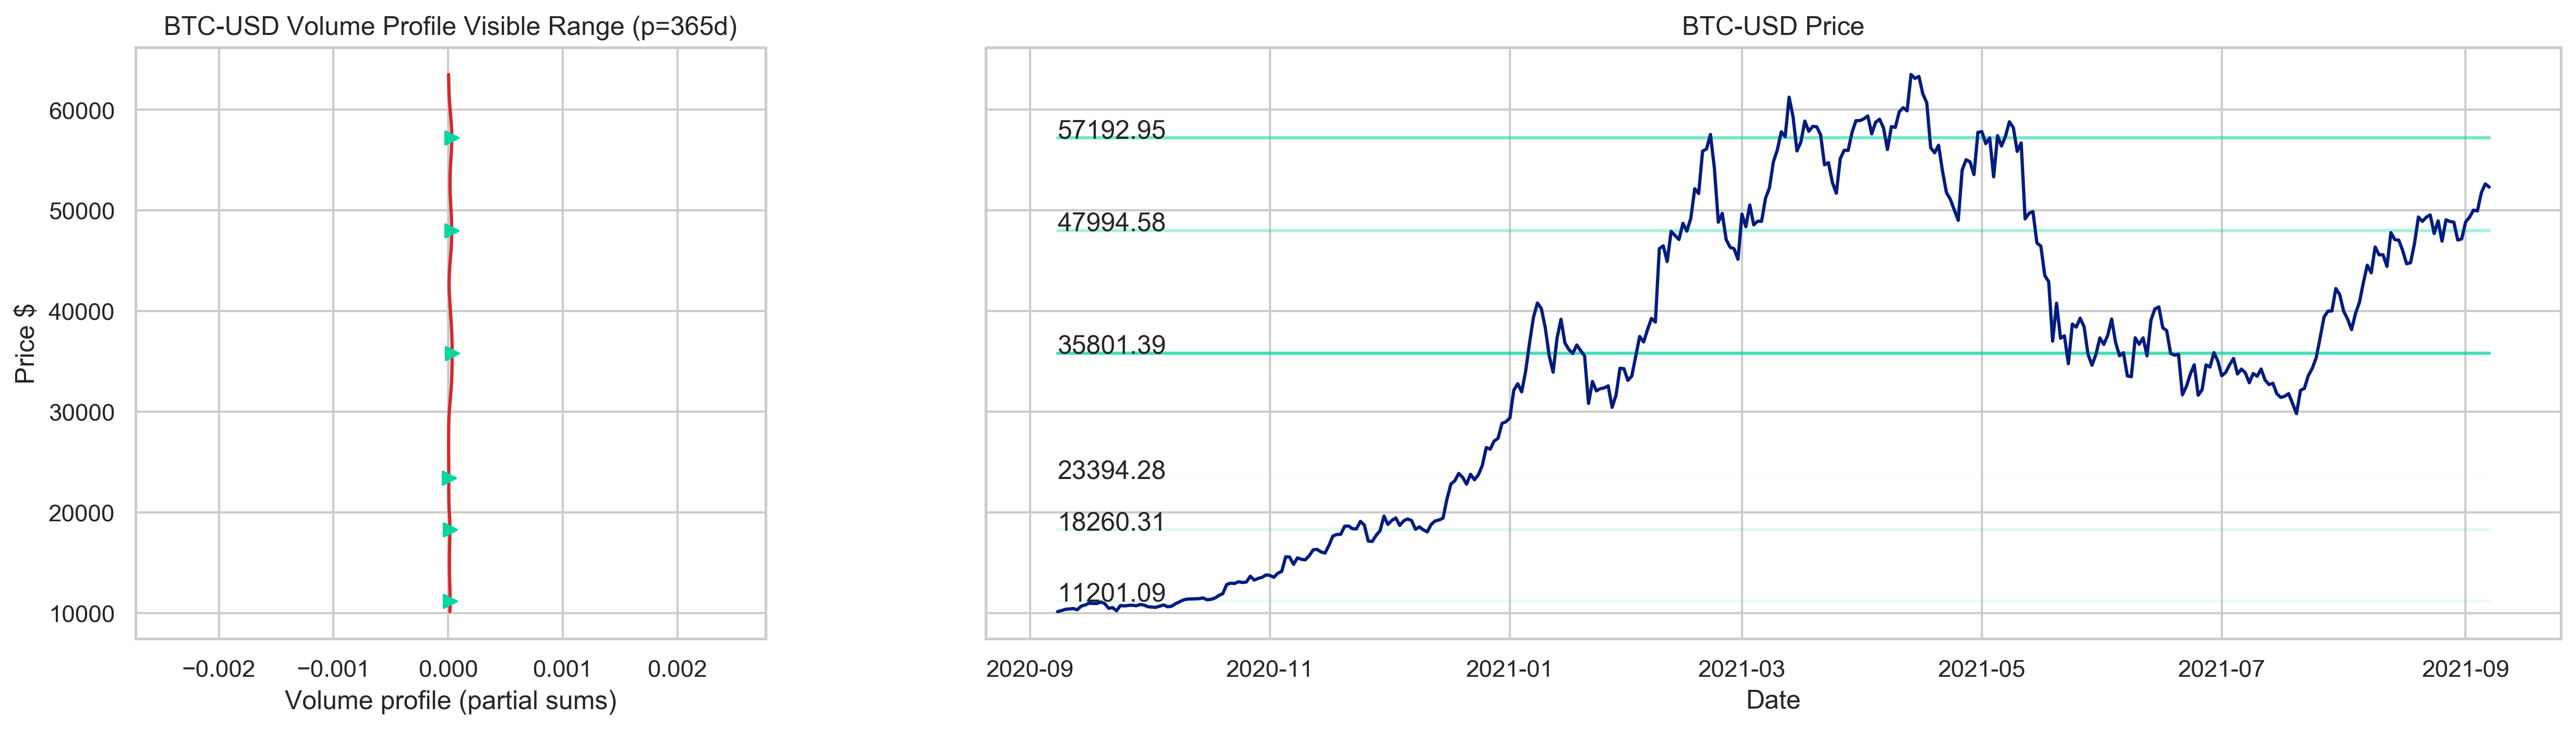

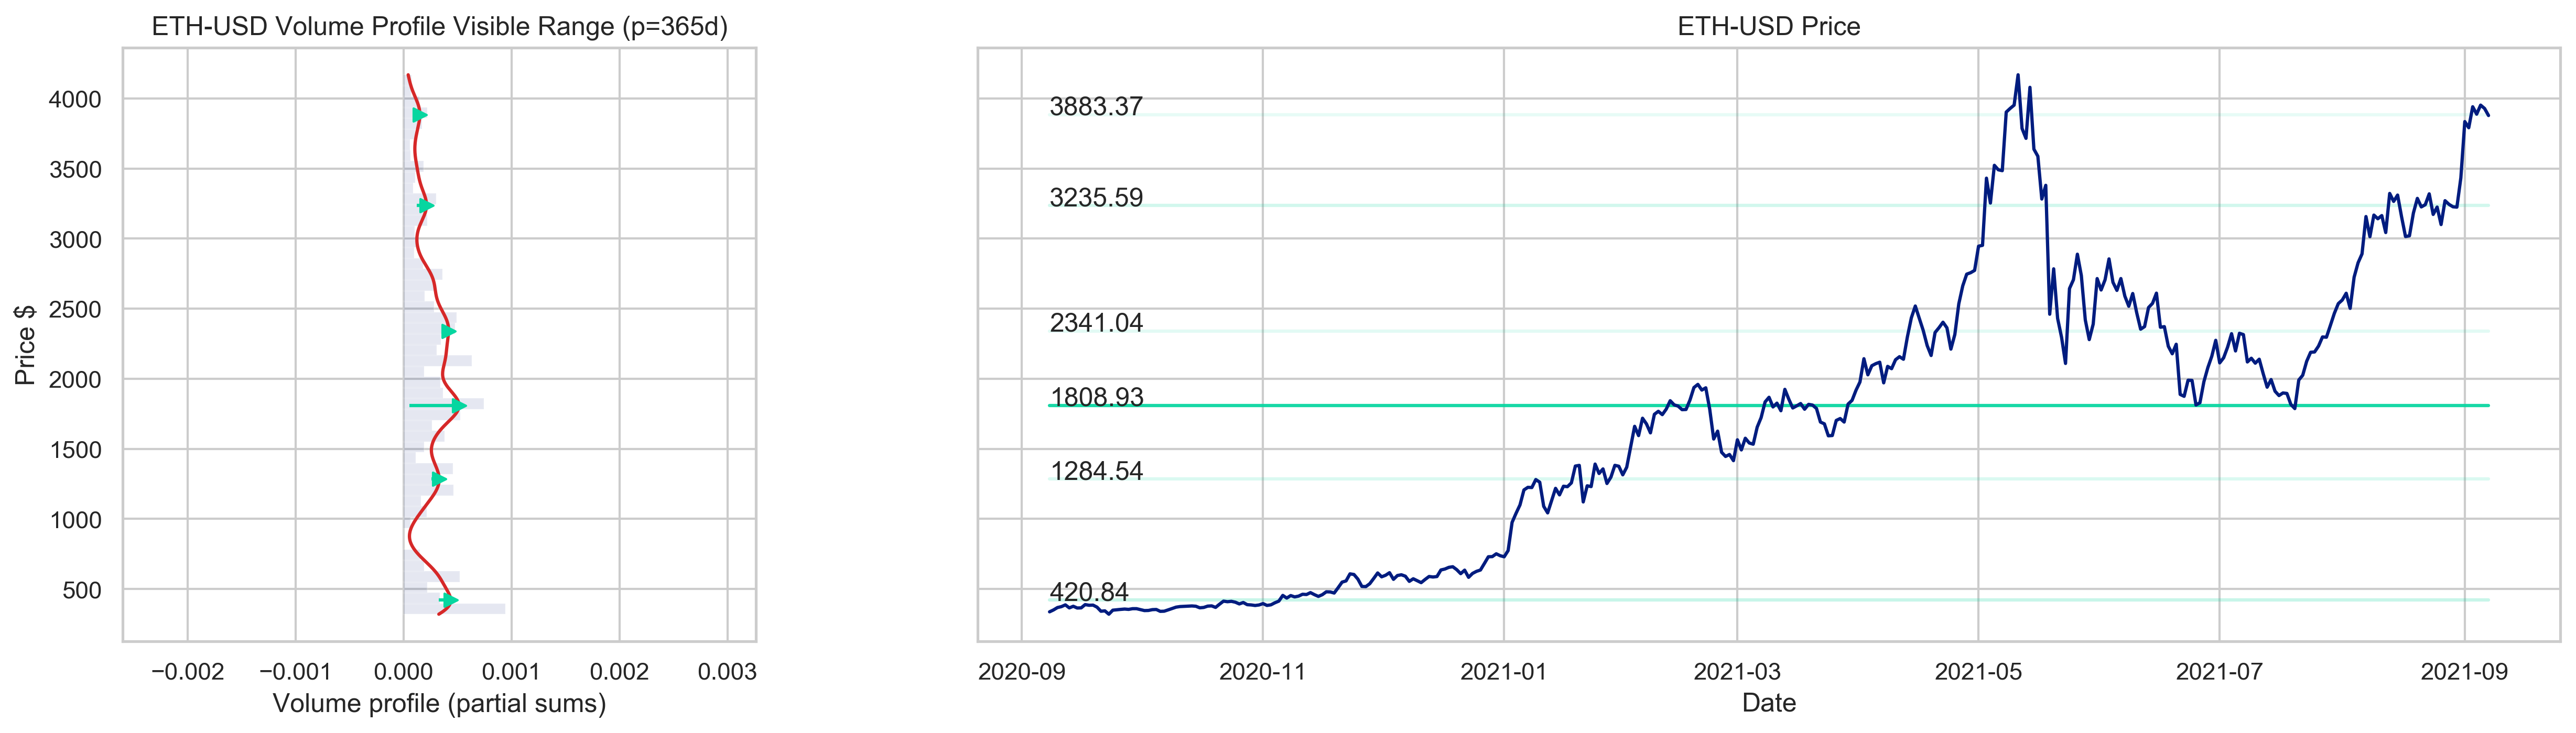

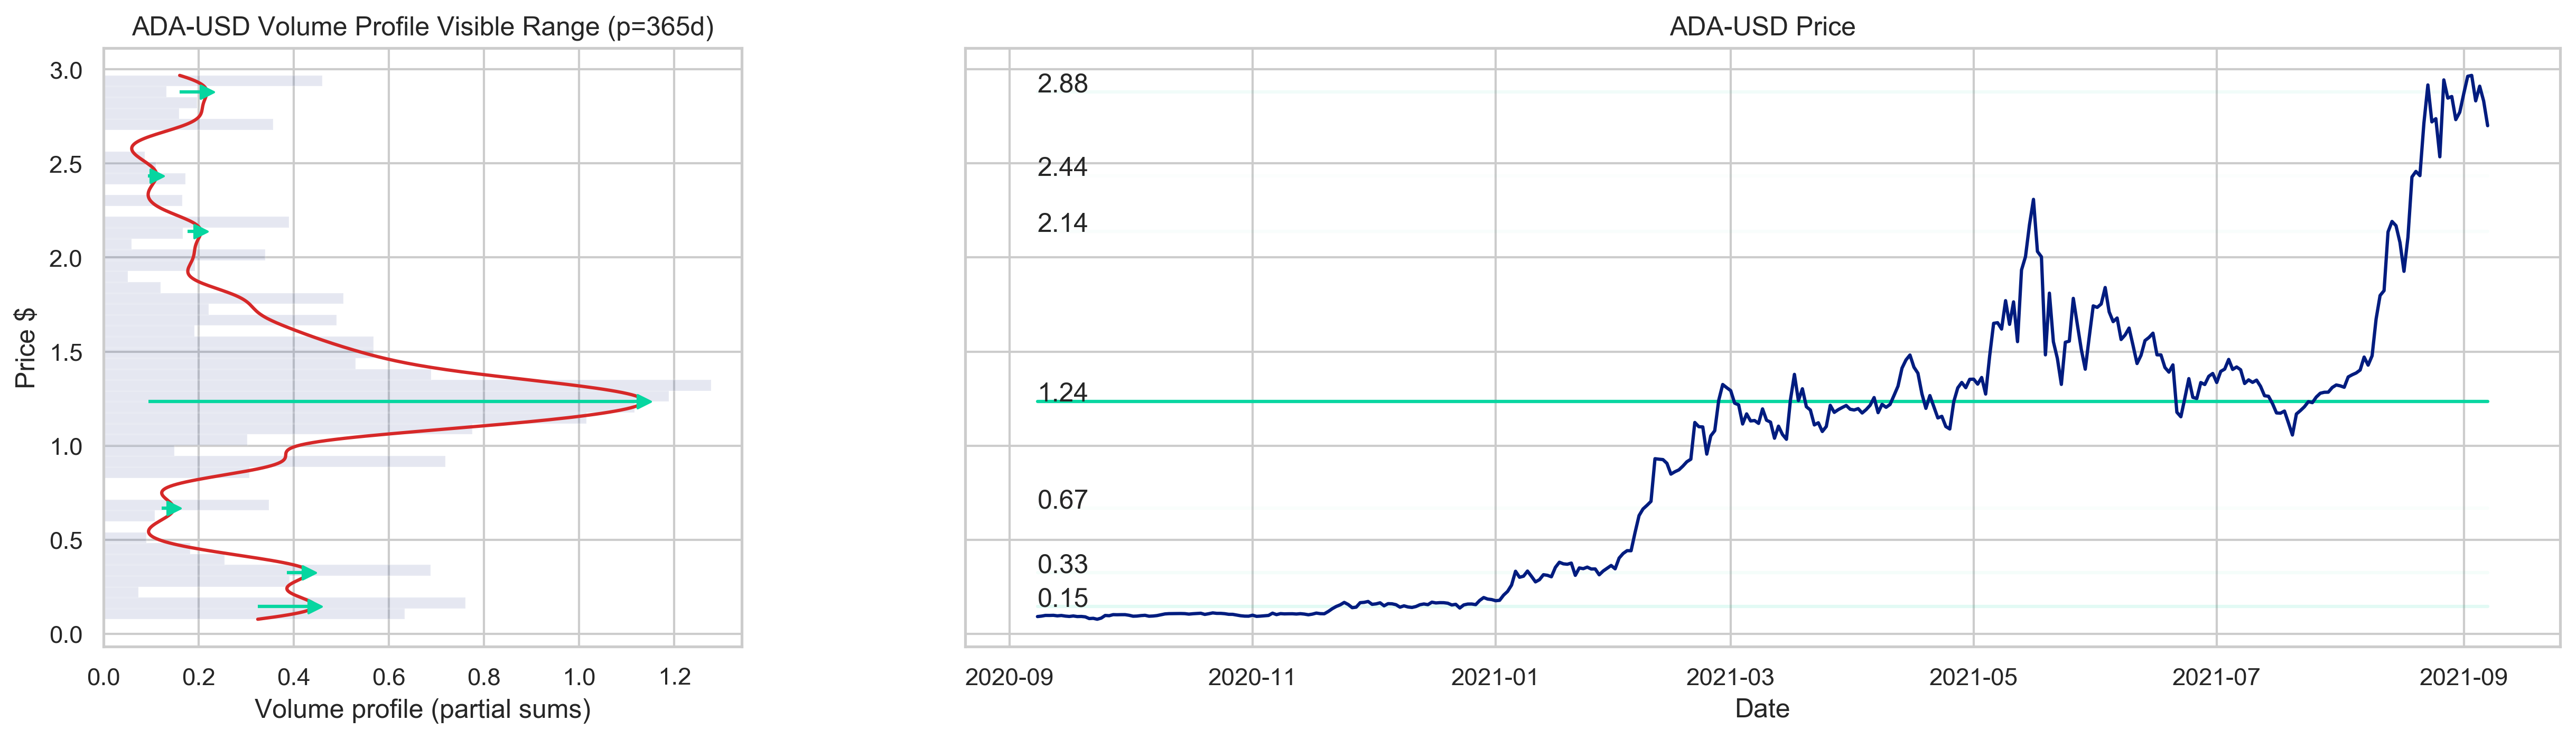

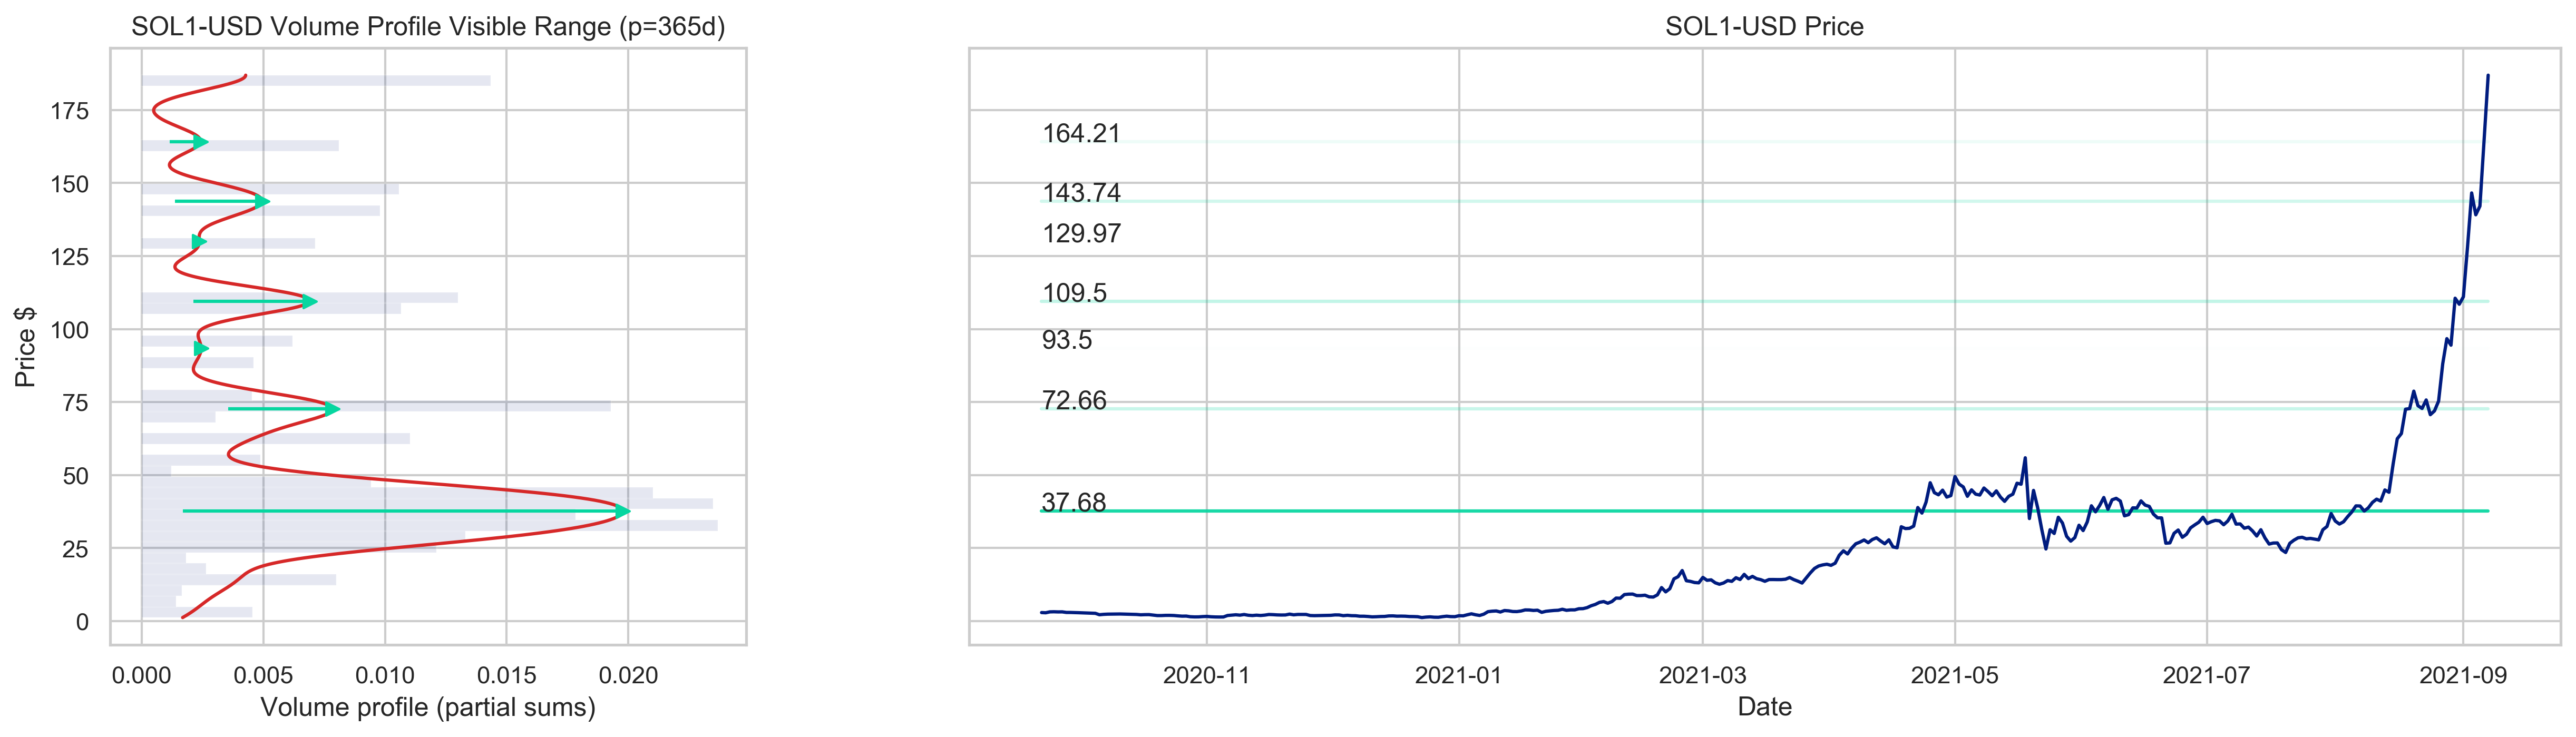

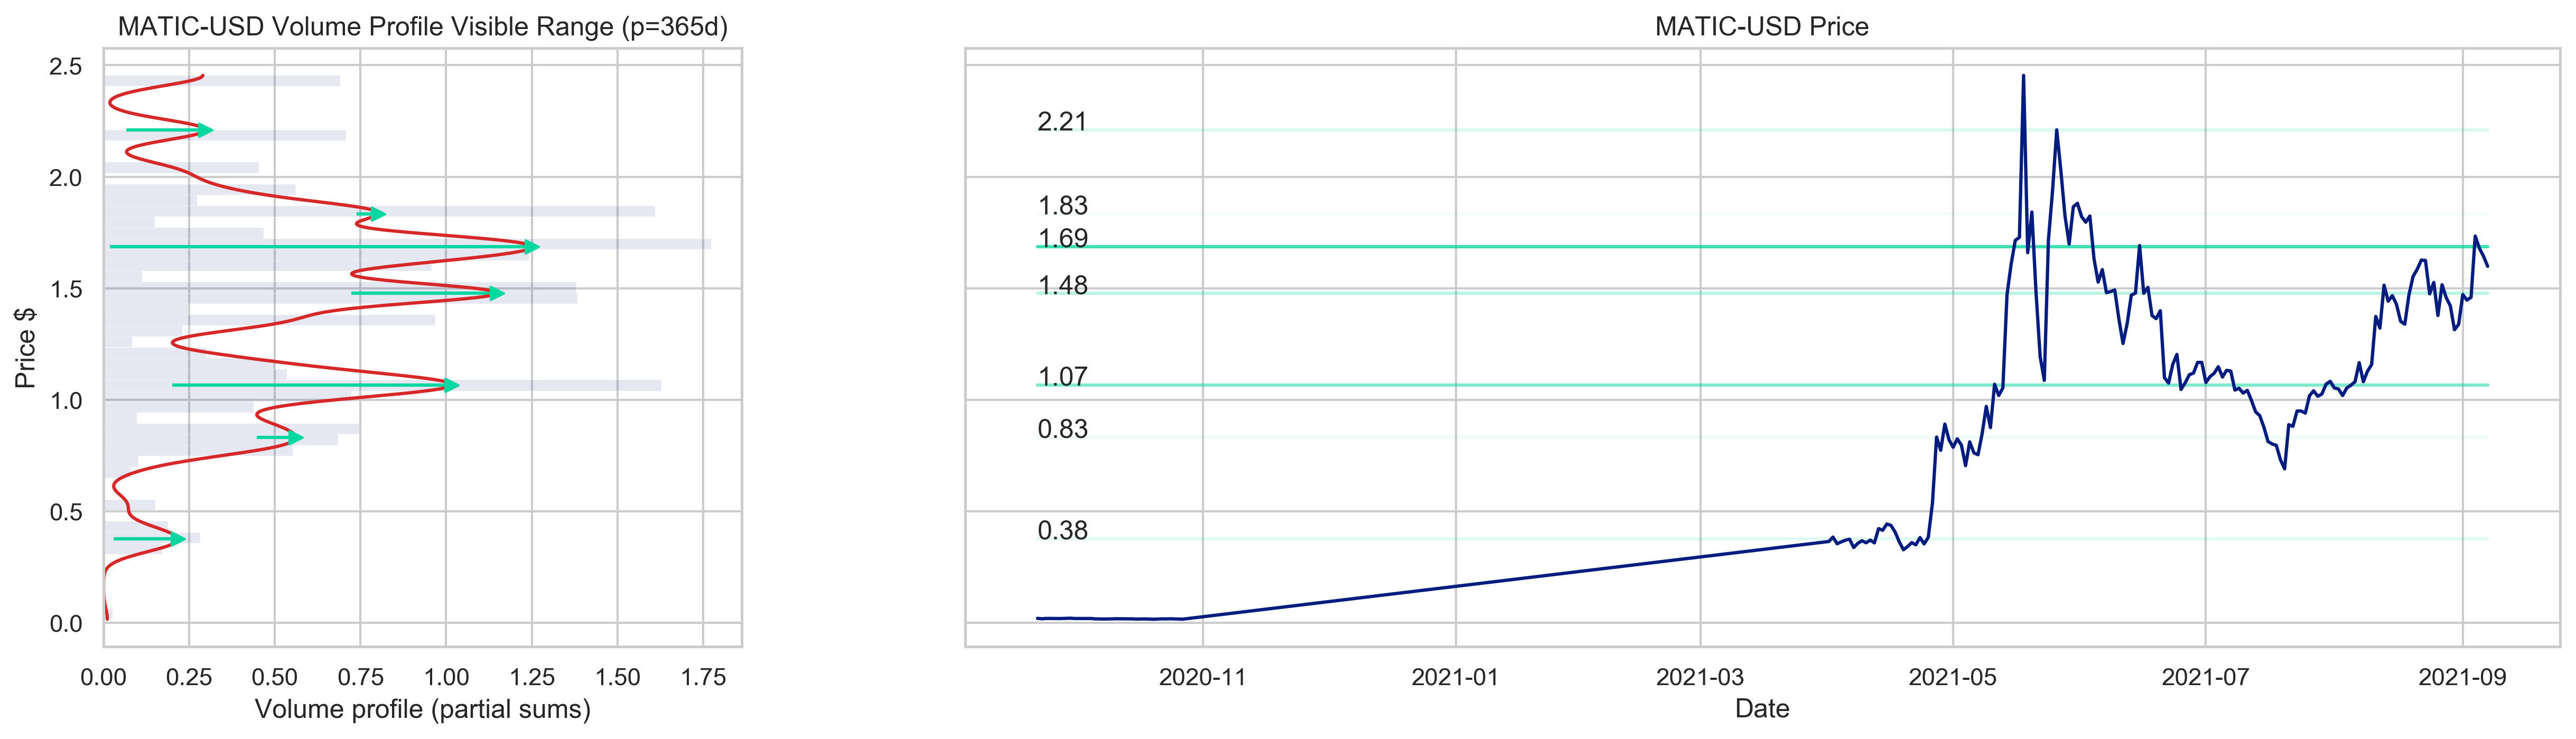

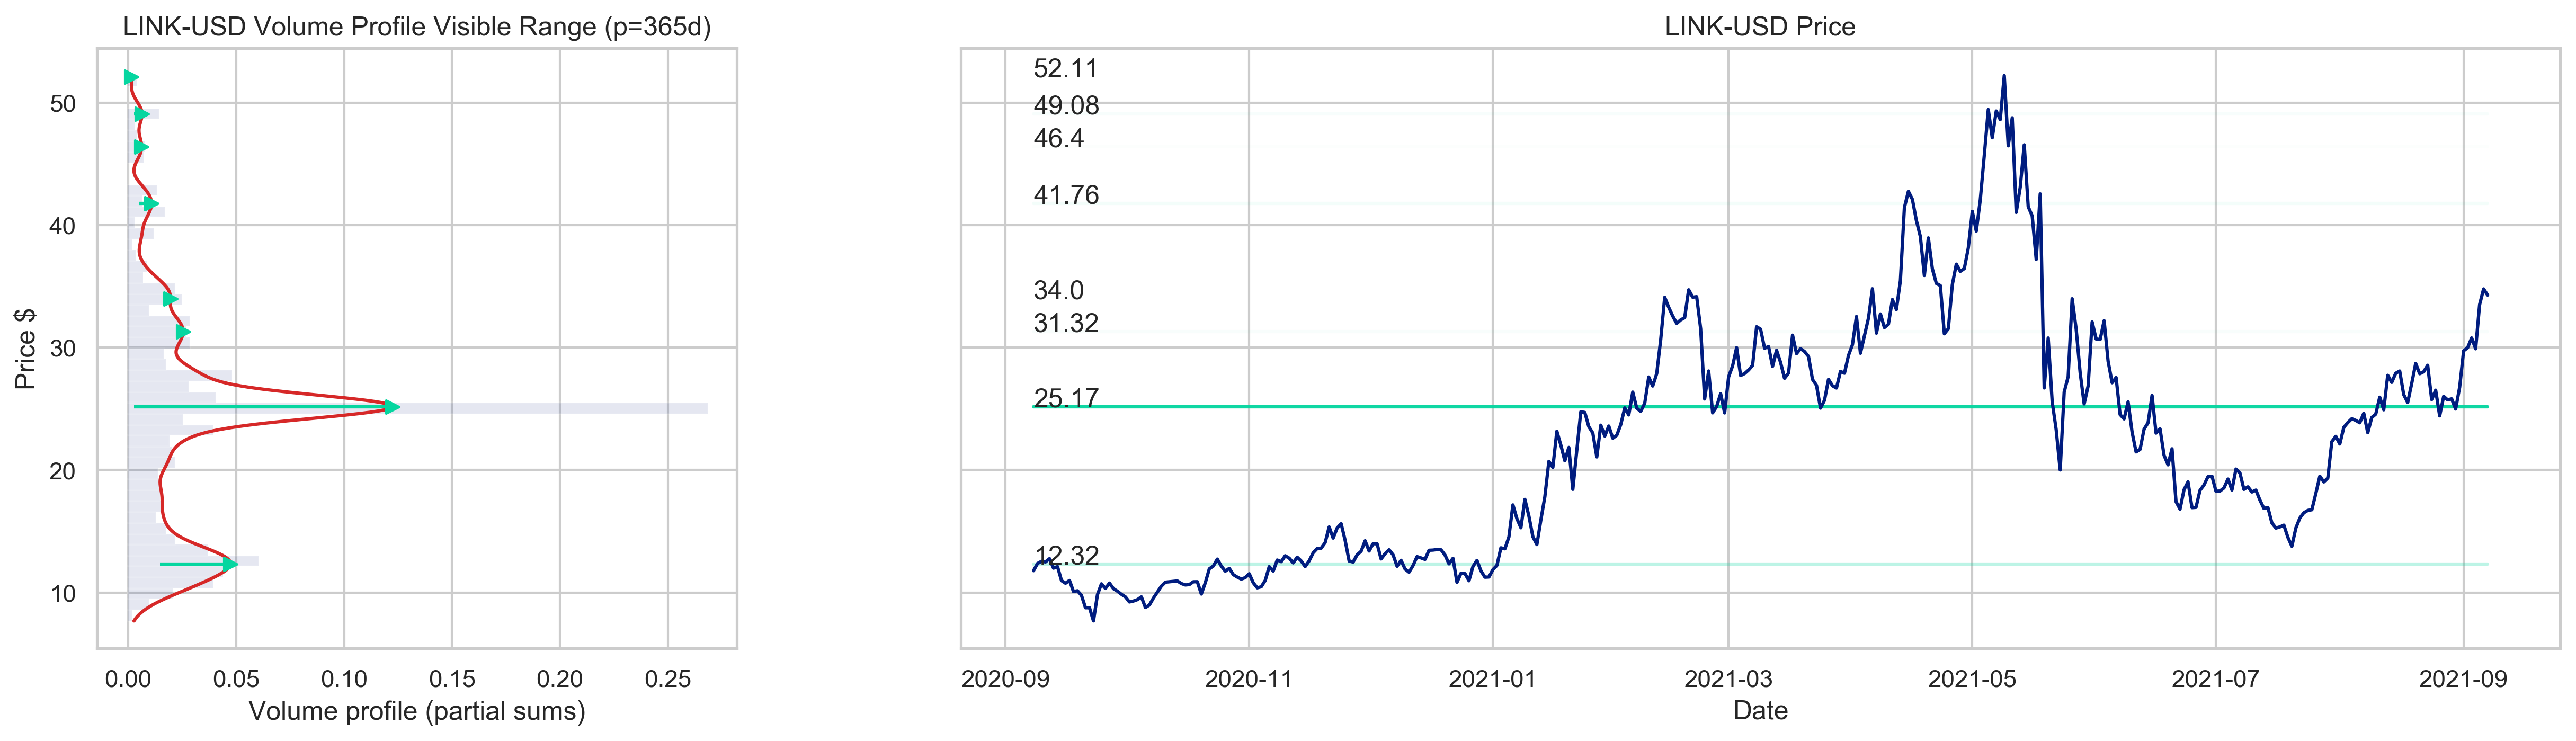

In [3]:
#hide_input
ticks = ['BTC-USD','ETH-USD','ADA-USD','SOL1-USD','MATIC-USD', 'LINK-USD']
for tick in ticks: 
  plot(tick, p=365)


NDQ.AX  | % distance from strongest support:  -17.56

ASIA.AX  | % distance from strongest support:  3.36

CLNE.AX  | % distance from strongest support:  -4.16

IOZ.AX  | % distance from strongest support:  -21.55

EMN.AX  | % distance from strongest support:  8.55


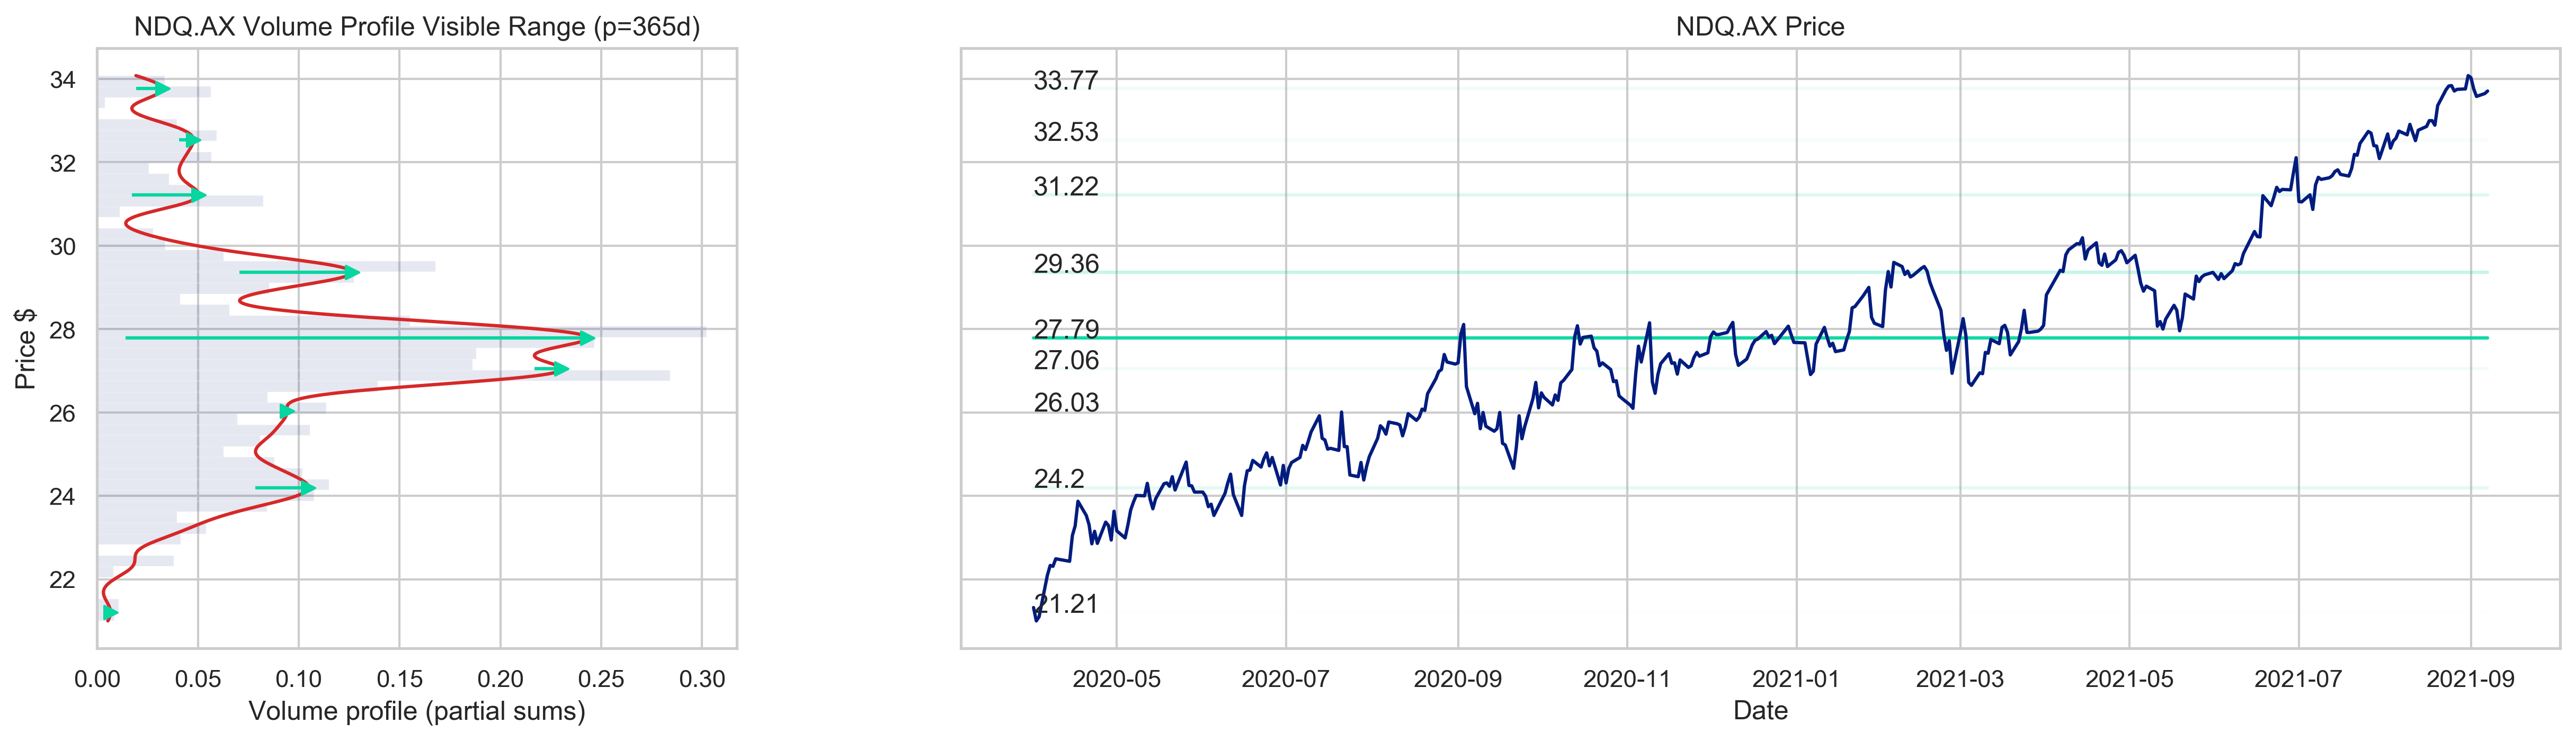

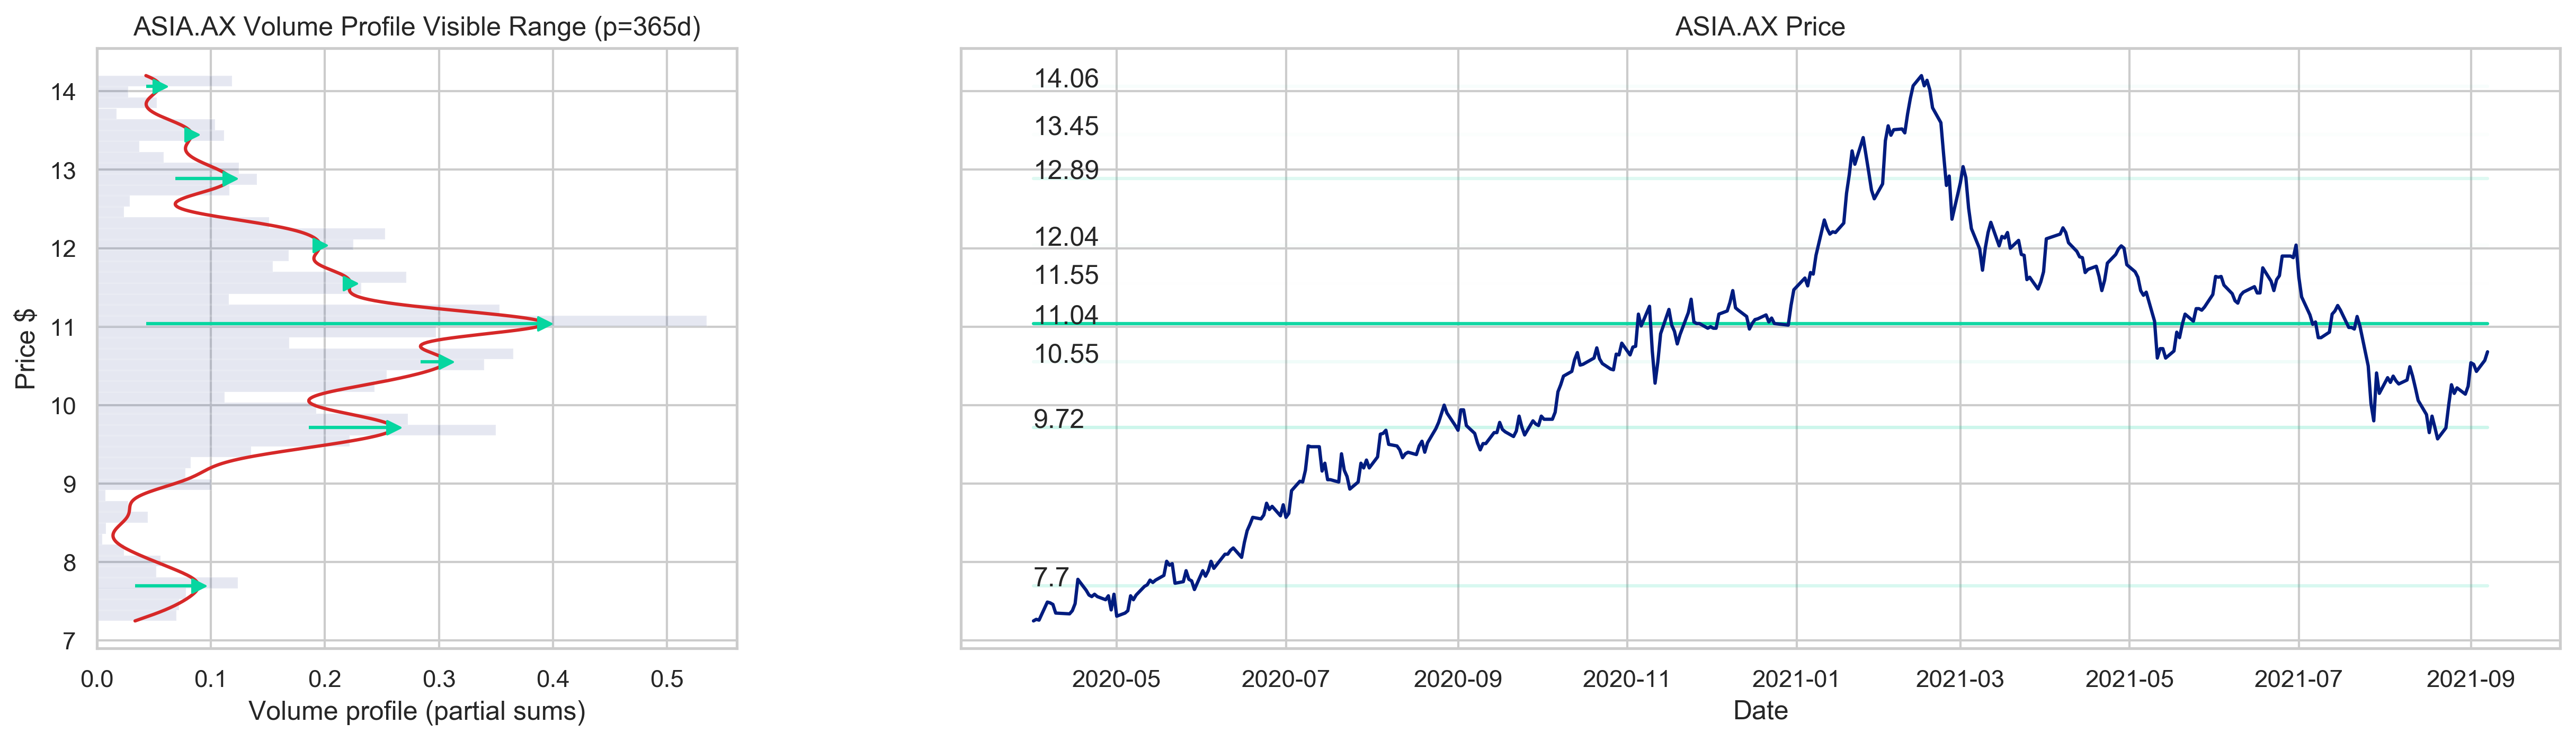

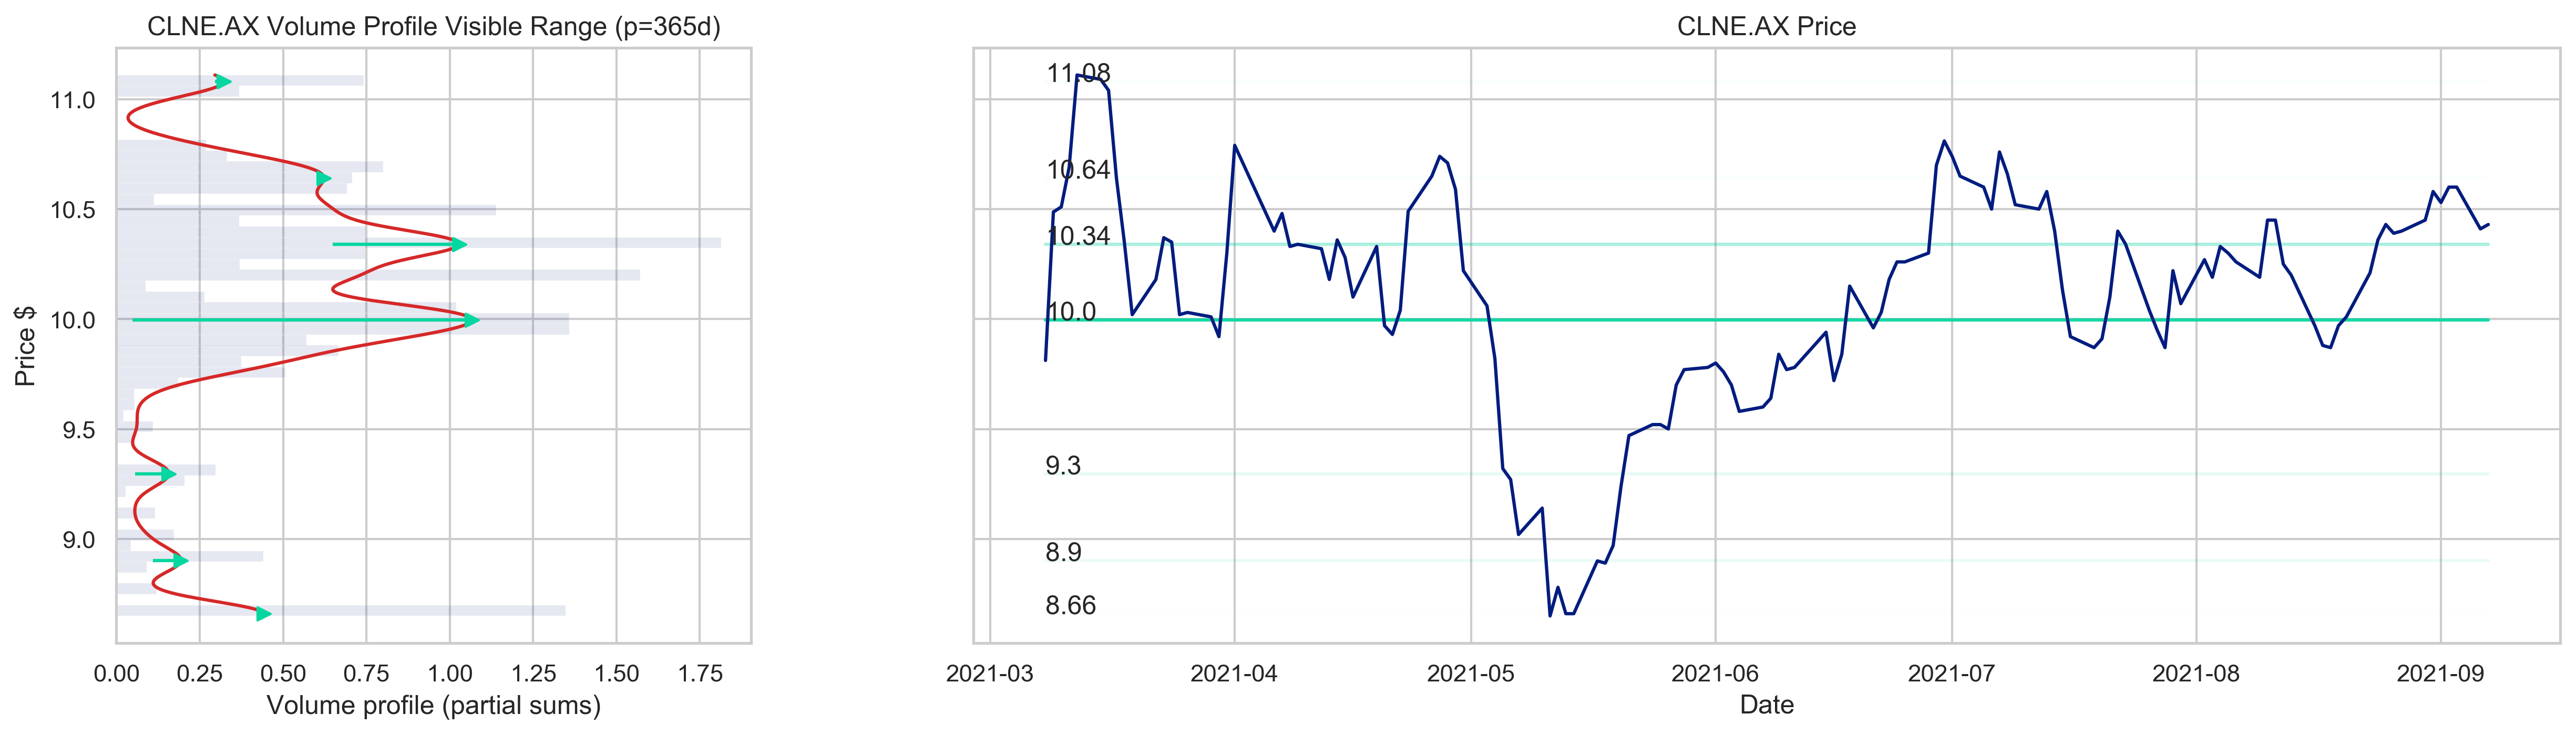

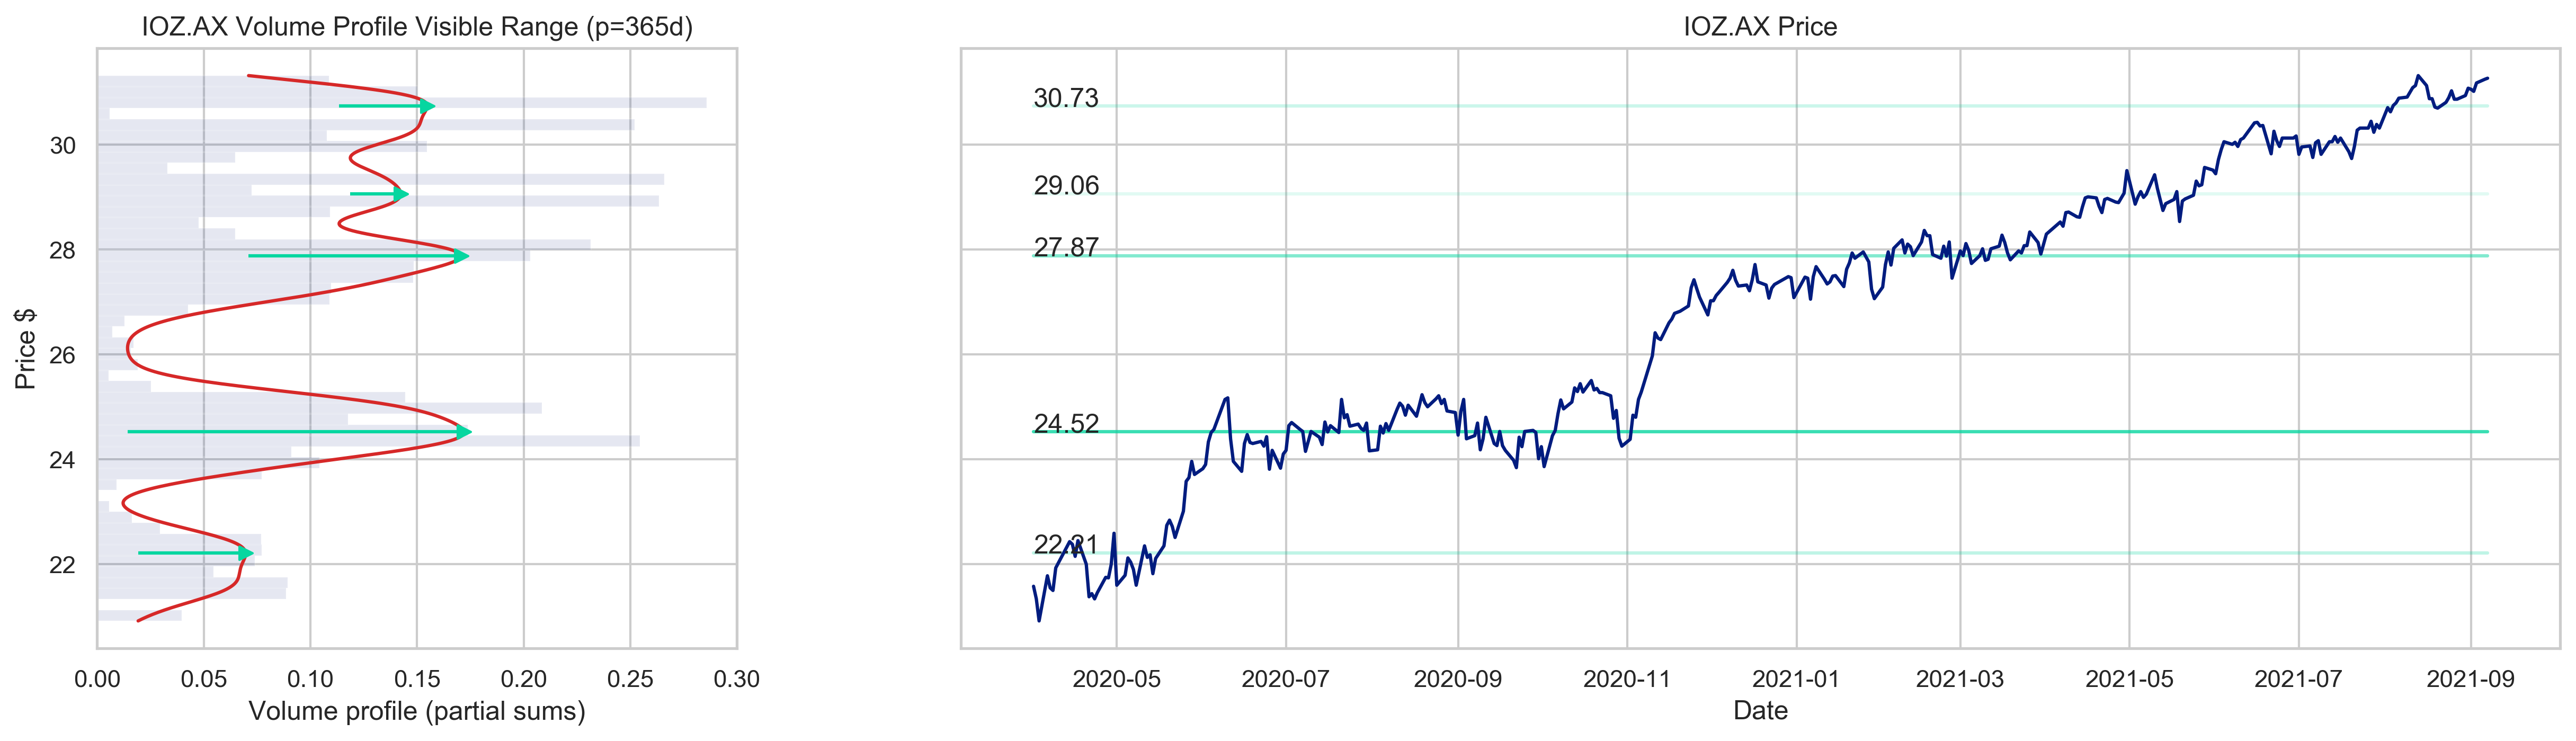

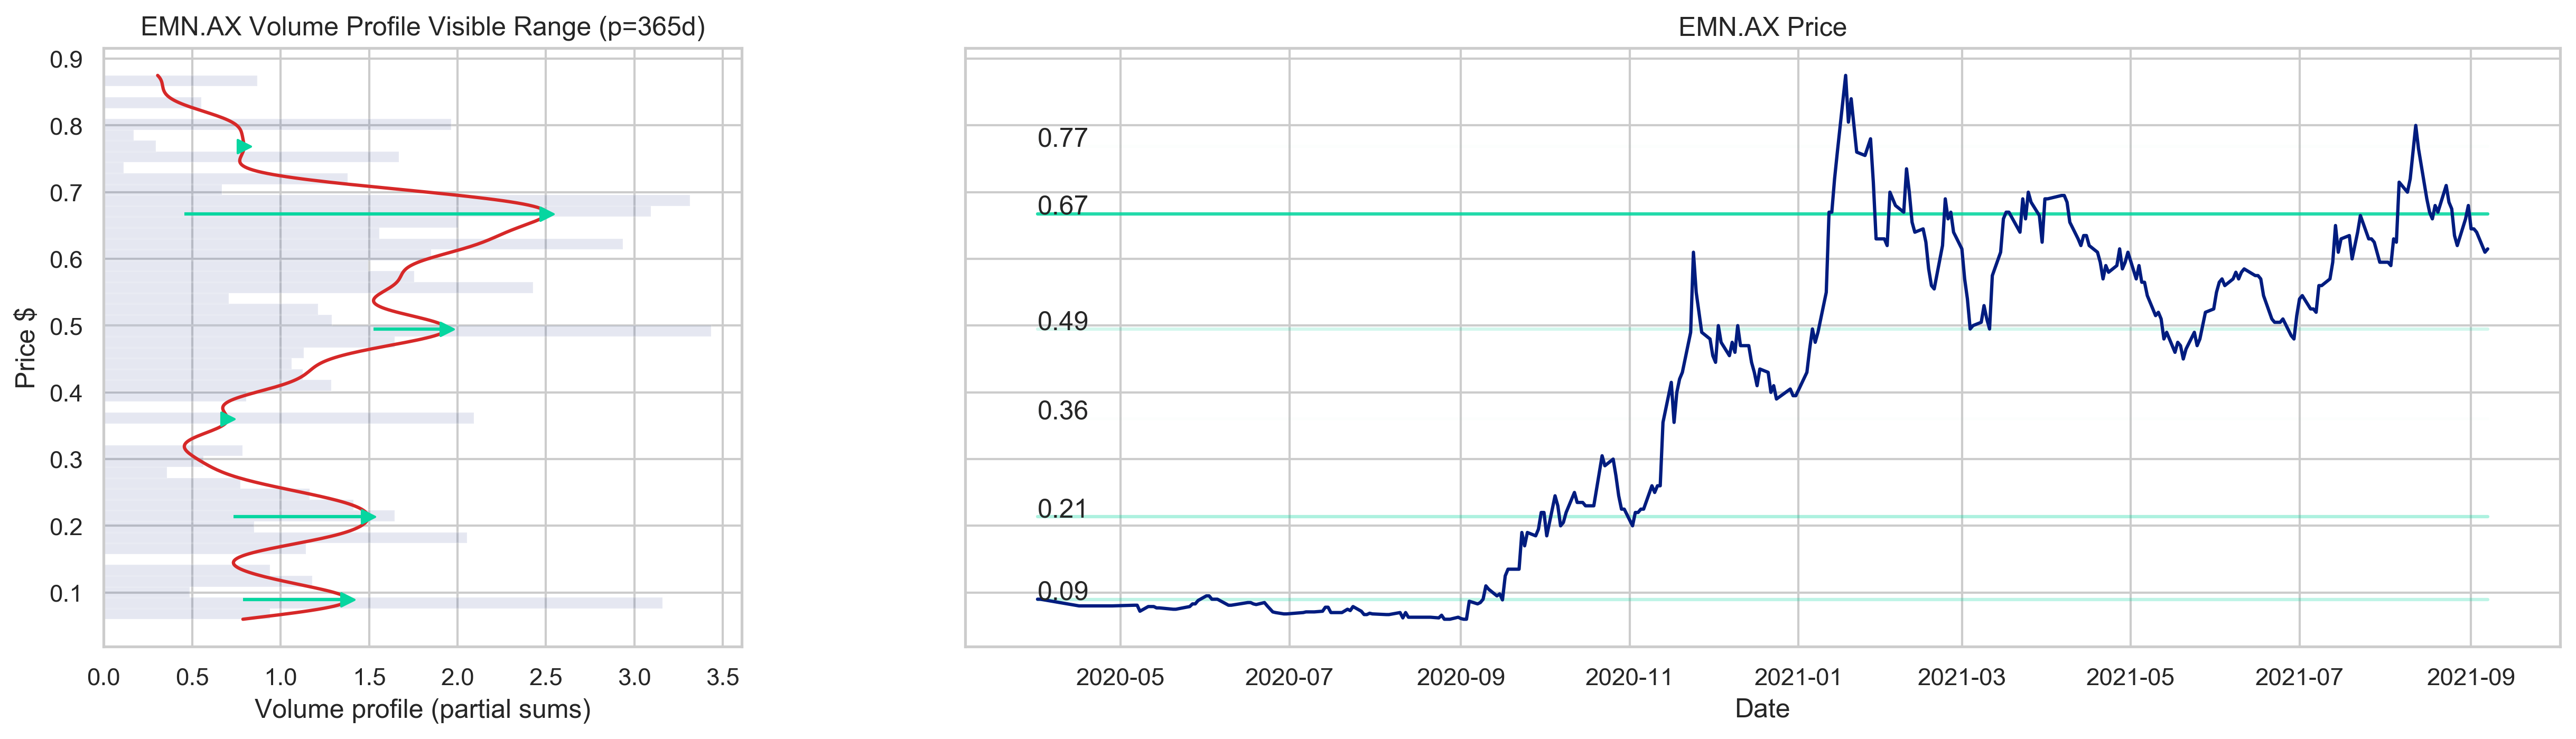

In [4]:
#hide
ticks = ['NDQ.AX','ASIA.AX','CLNE.AX','IOZ.AX','EMN.AX']
for tick in ticks: 
  plot(tick, p=365)

In [5]:
#hide
KT = ['DAG-USDT','LTX-USDT', 'COTI-USDT', 'UTK-BTC', 'OCEAN-BTC', 'ORN-USDT', 
      'ALEPH-USDT', 'CHR-USDT', 'NOIA-USDT','ALBT-USDT','UOS-USDT',
      'CGG-USDT', 'AVA-USDT', 'SOUL-USDT', 'GOVI-USDT']


DAG-USDT  | % distance from strongest support:  -40.42

LTX-USDT  | % distance from strongest support:  -80.91

COTI-USDT  | % distance from strongest support:  -64.11

UTK-BTC  | % distance from strongest support:  41.88

OCEAN-BTC  | % distance from strongest support:  30.18

ORN-USDT  | % distance from strongest support:  -15.96

ALEPH-USDT  | % distance from strongest support:  -20.71

CHR-USDT  | % distance from strongest support:  -19.85

NOIA-USDT  | % distance from strongest support:  -32.05

ALBT-USDT  | % distance from strongest support:  -47.89

UOS-USDT  | % distance from strongest support:  -44.41

CGG-USDT  | % distance from strongest support:  -73.68

AVA-USDT  | % distance from strongest support:  -48.39

SOUL-USDT  | % distance from strongest support:  -41.82

GOVI-USDT  | % distance from strongest support:  71.04


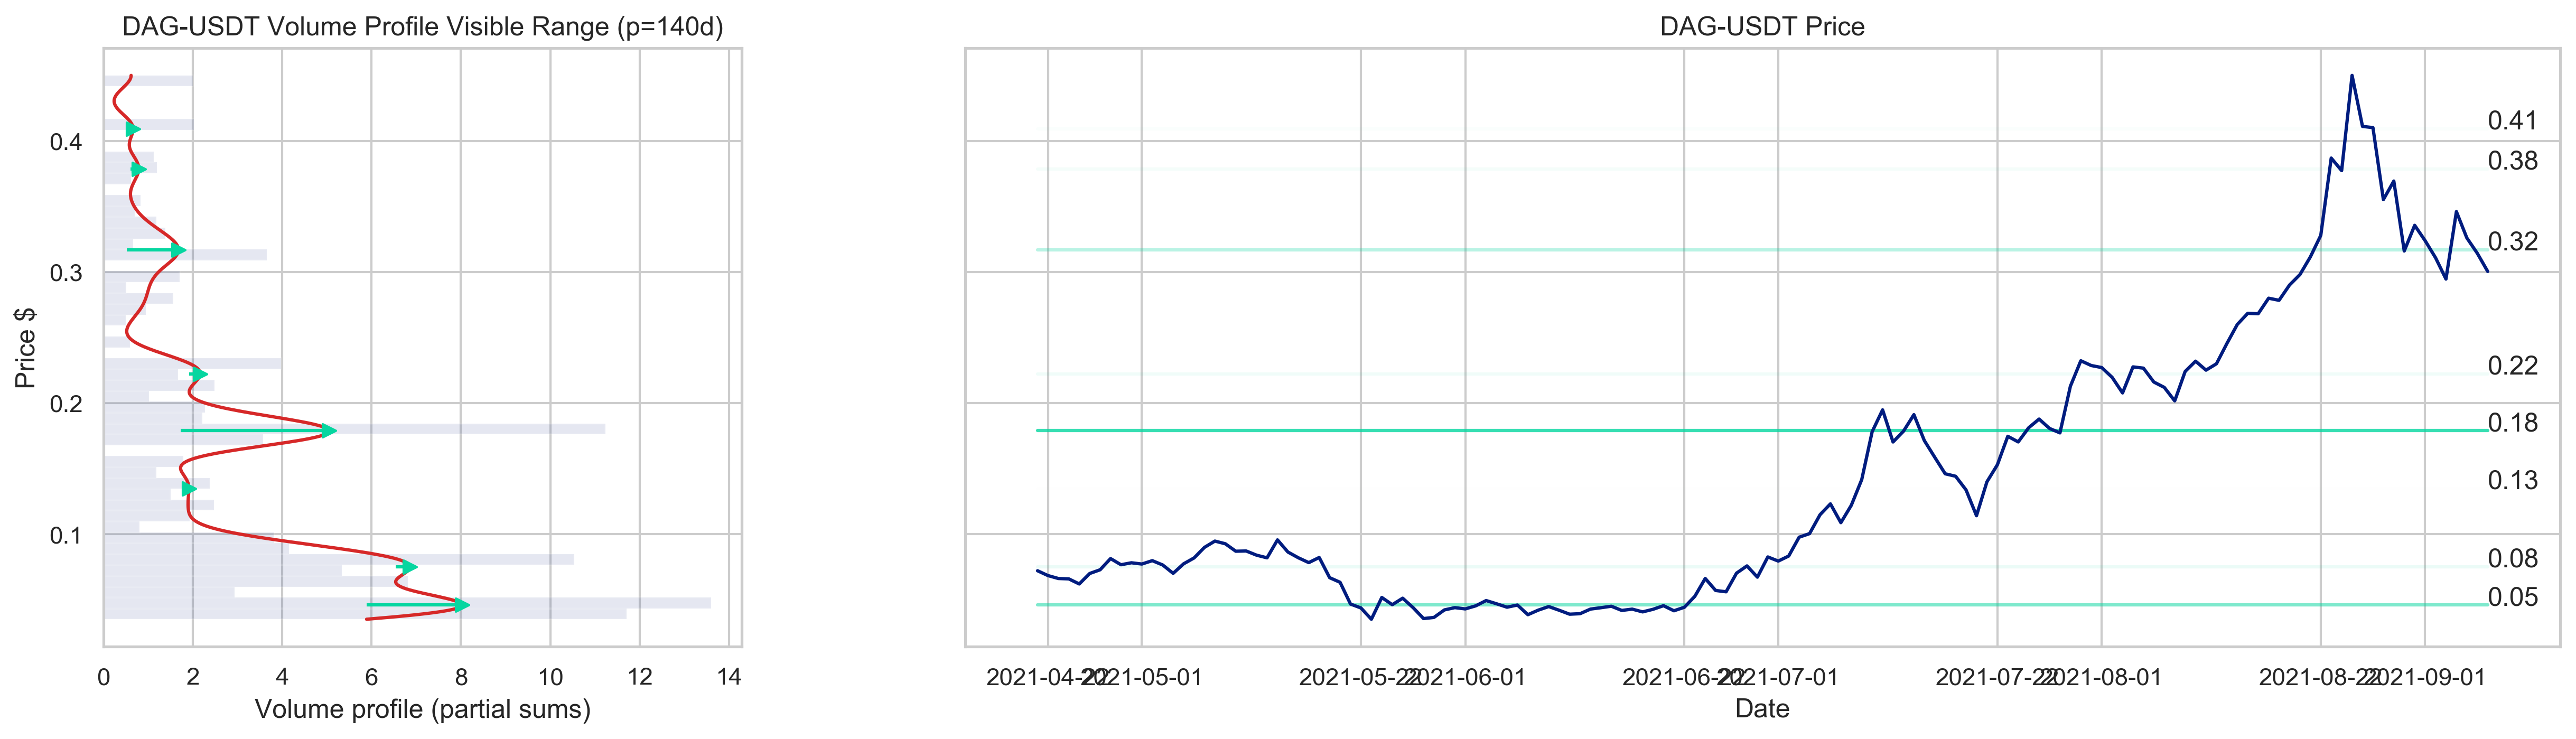

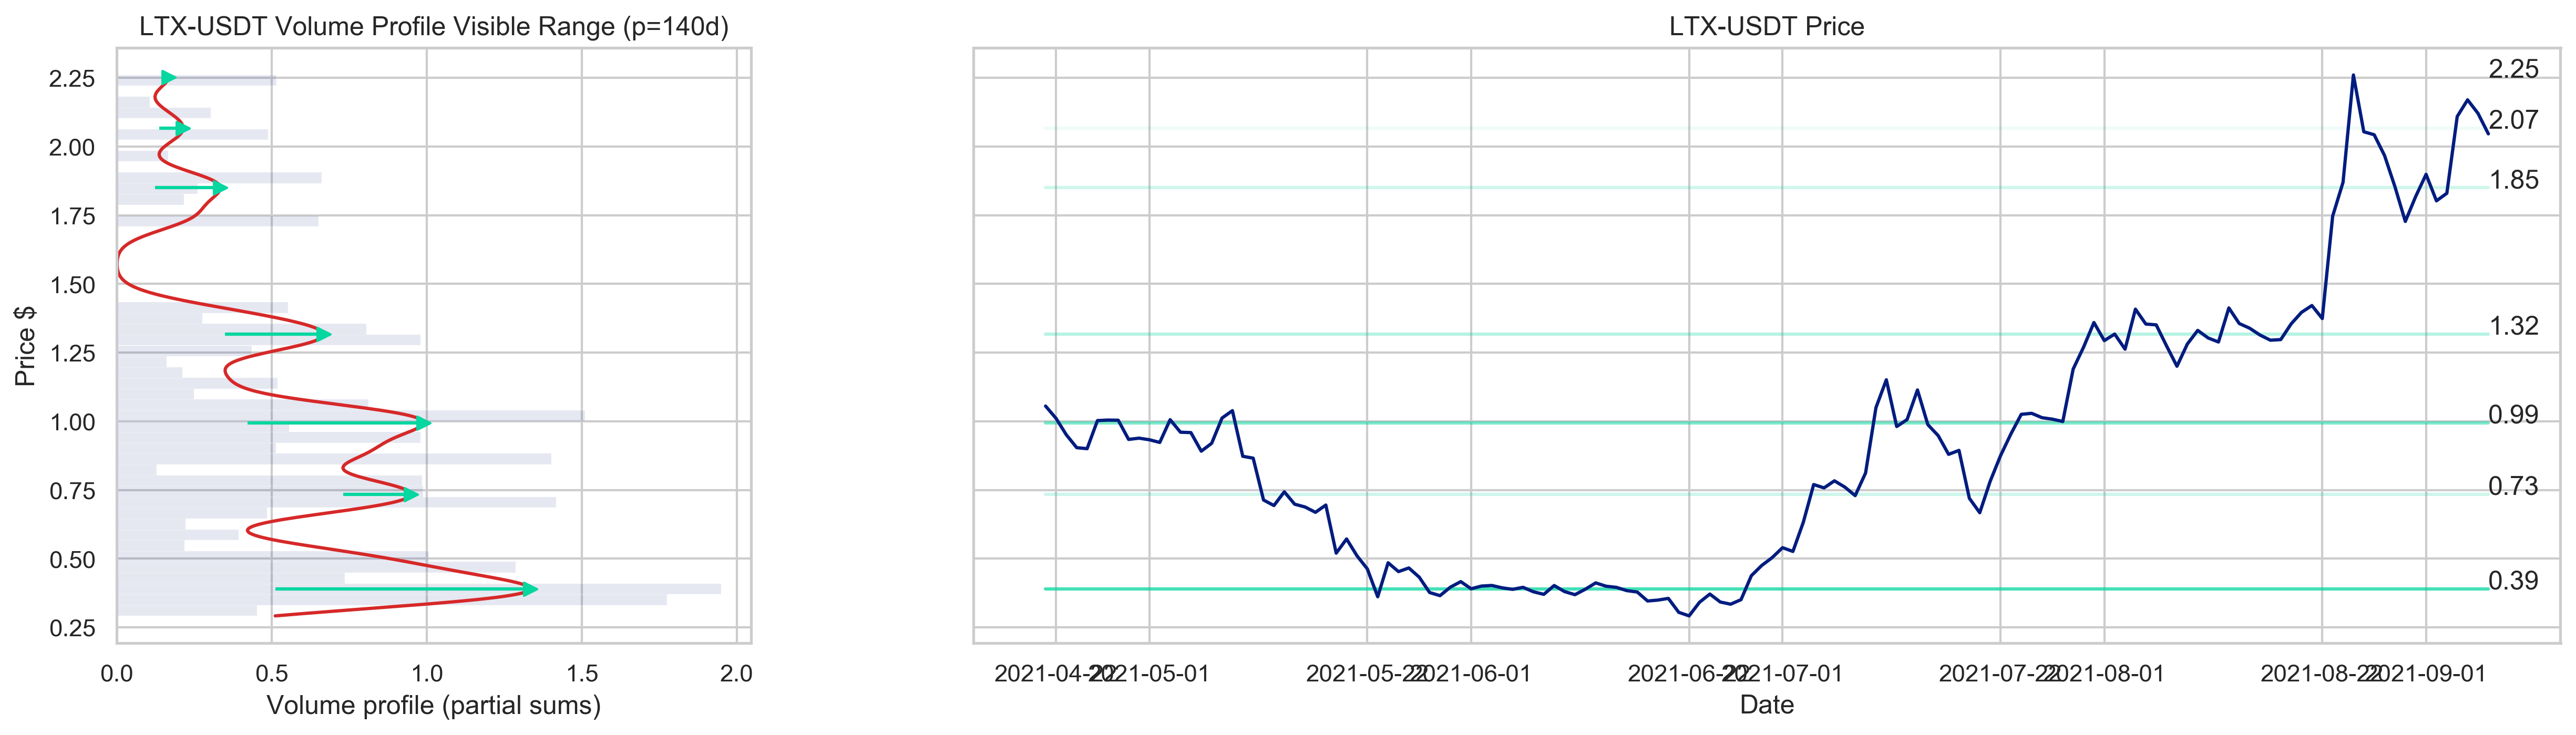

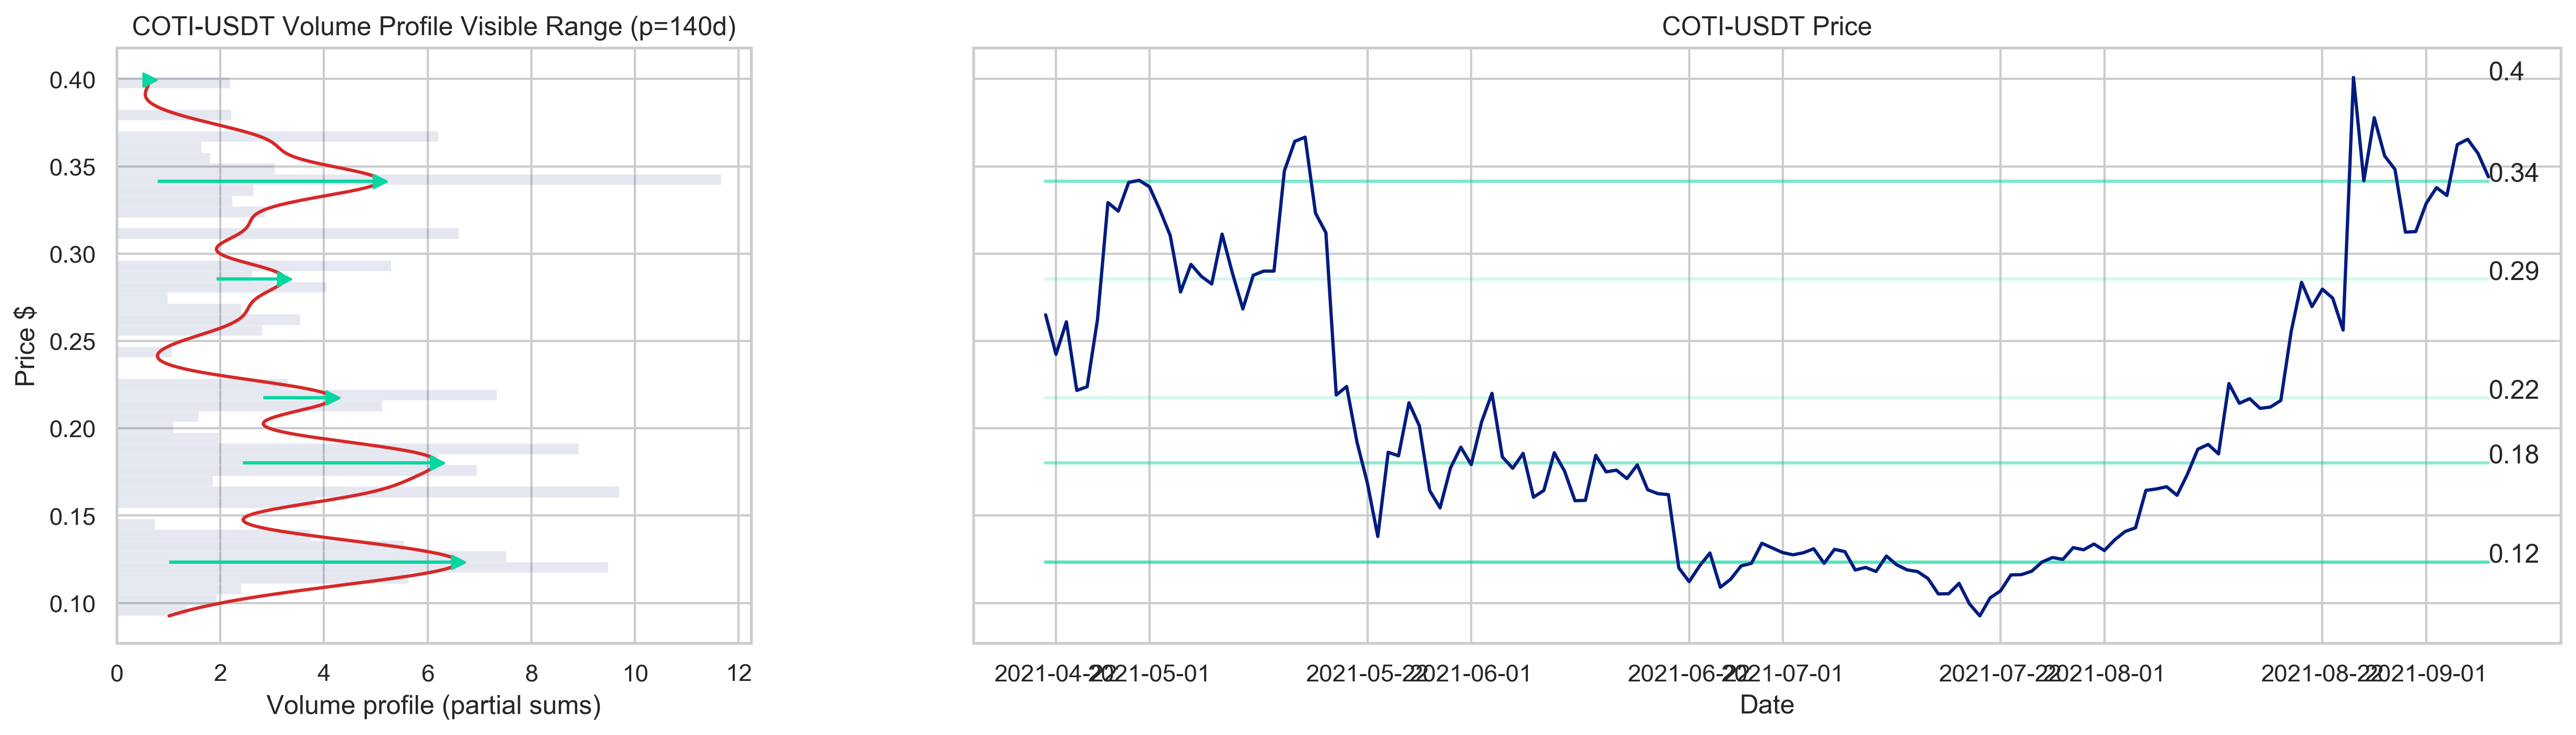

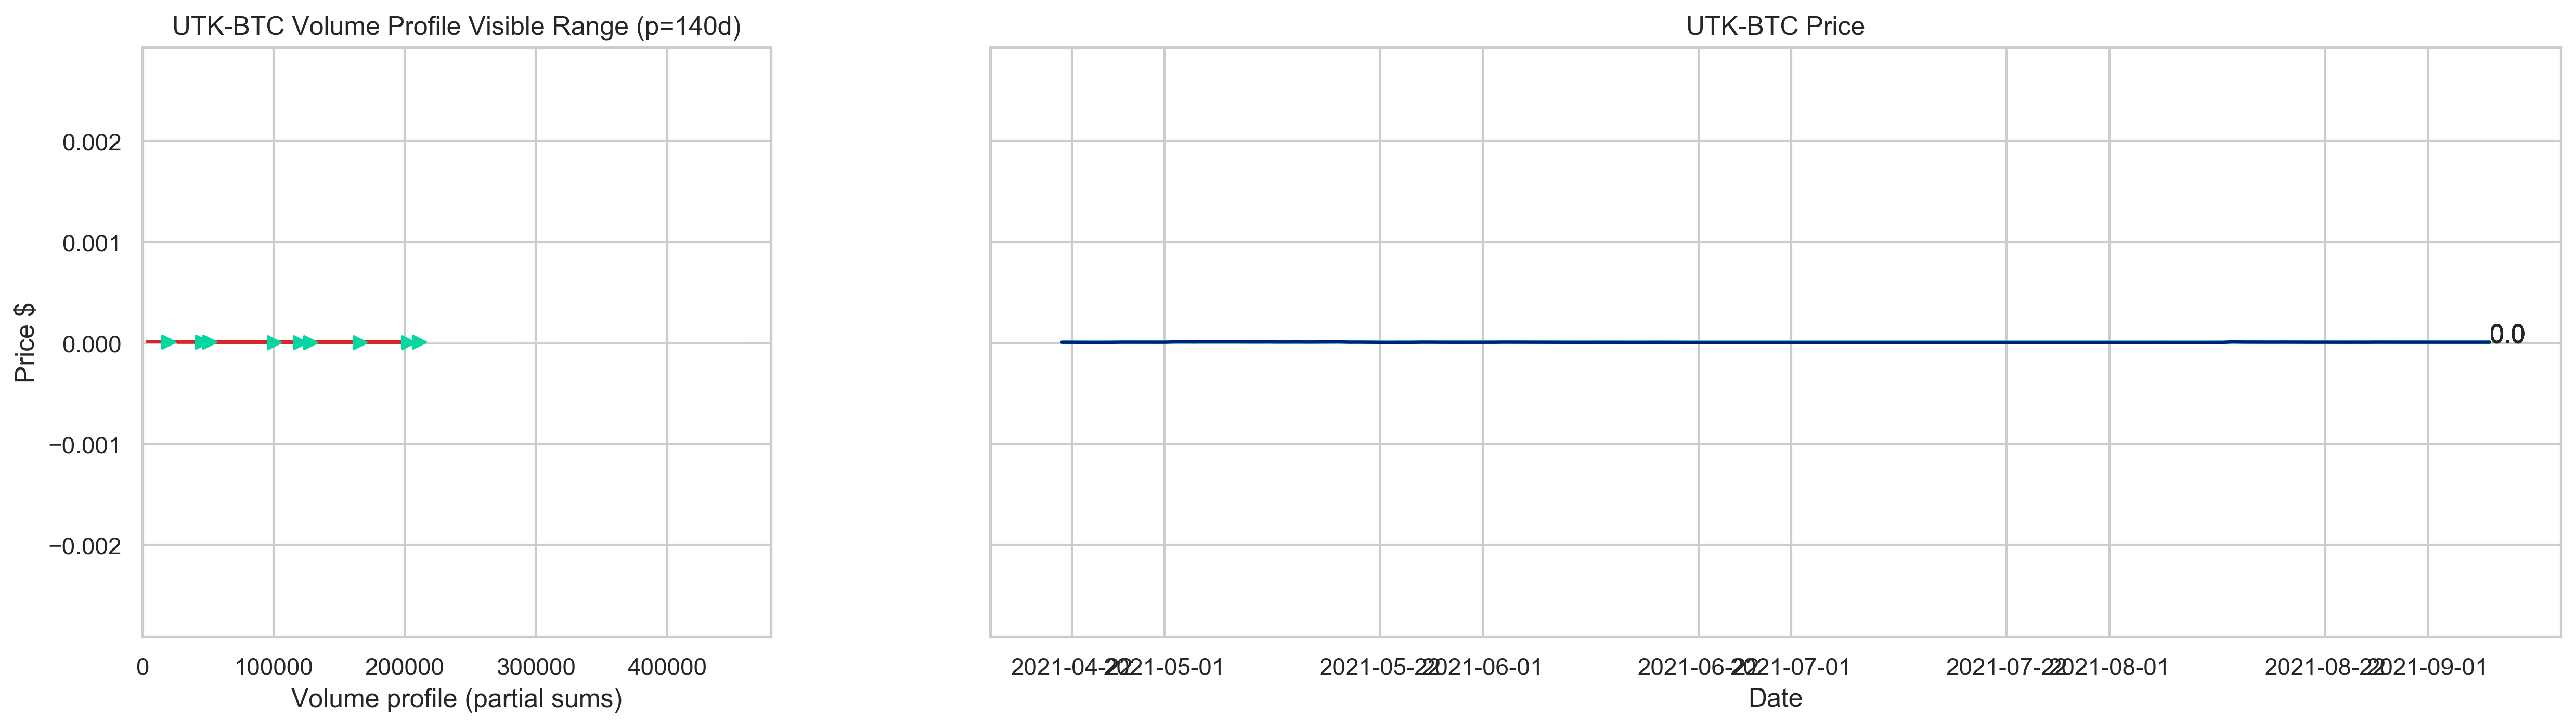

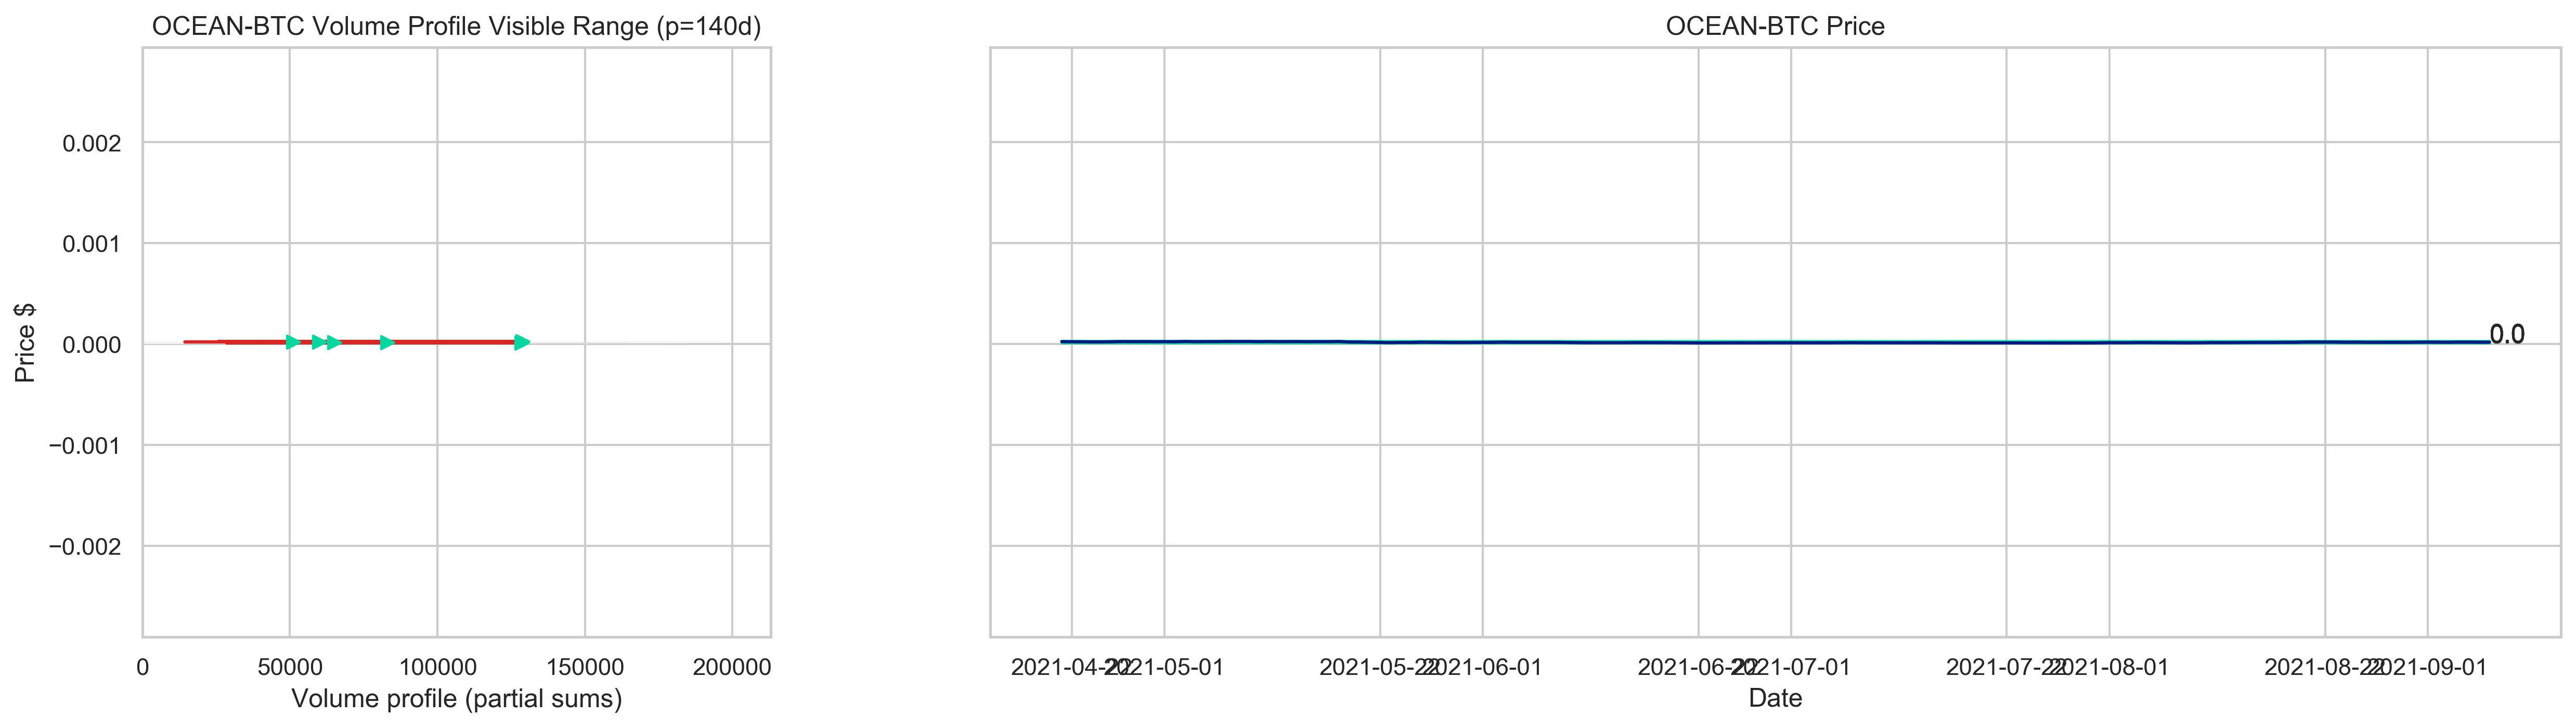

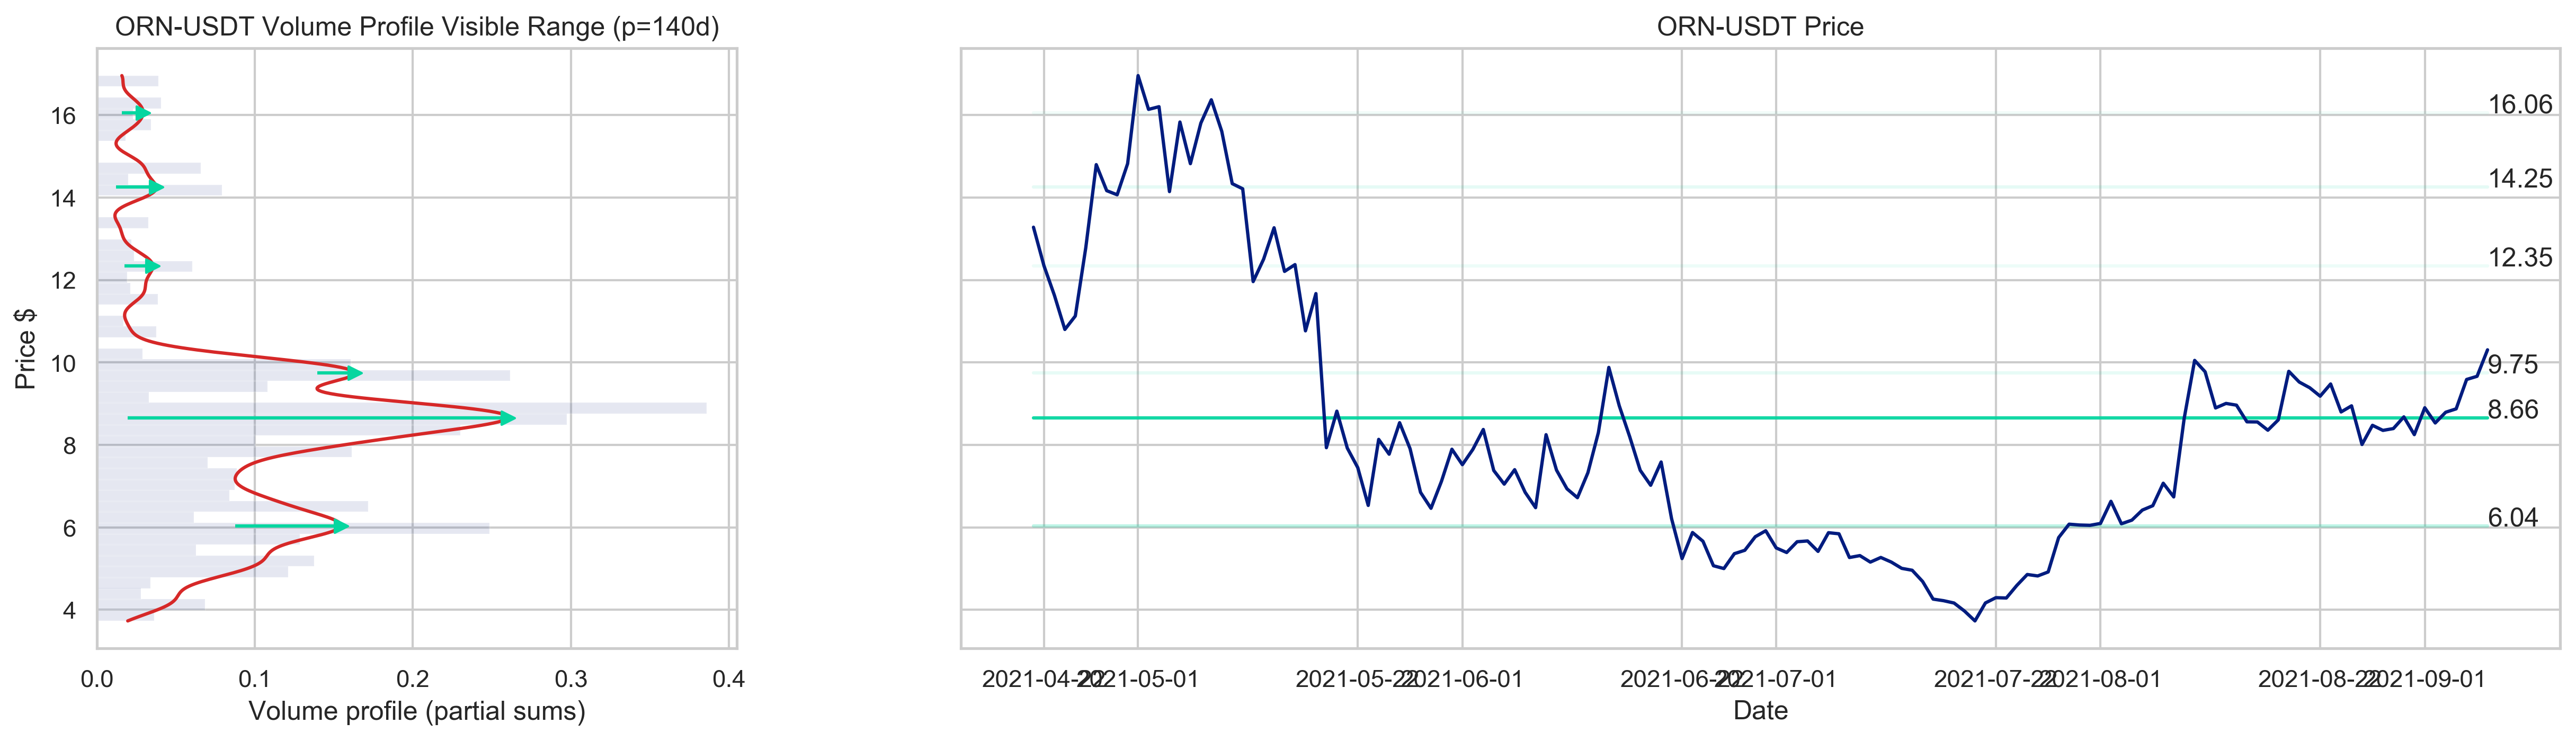

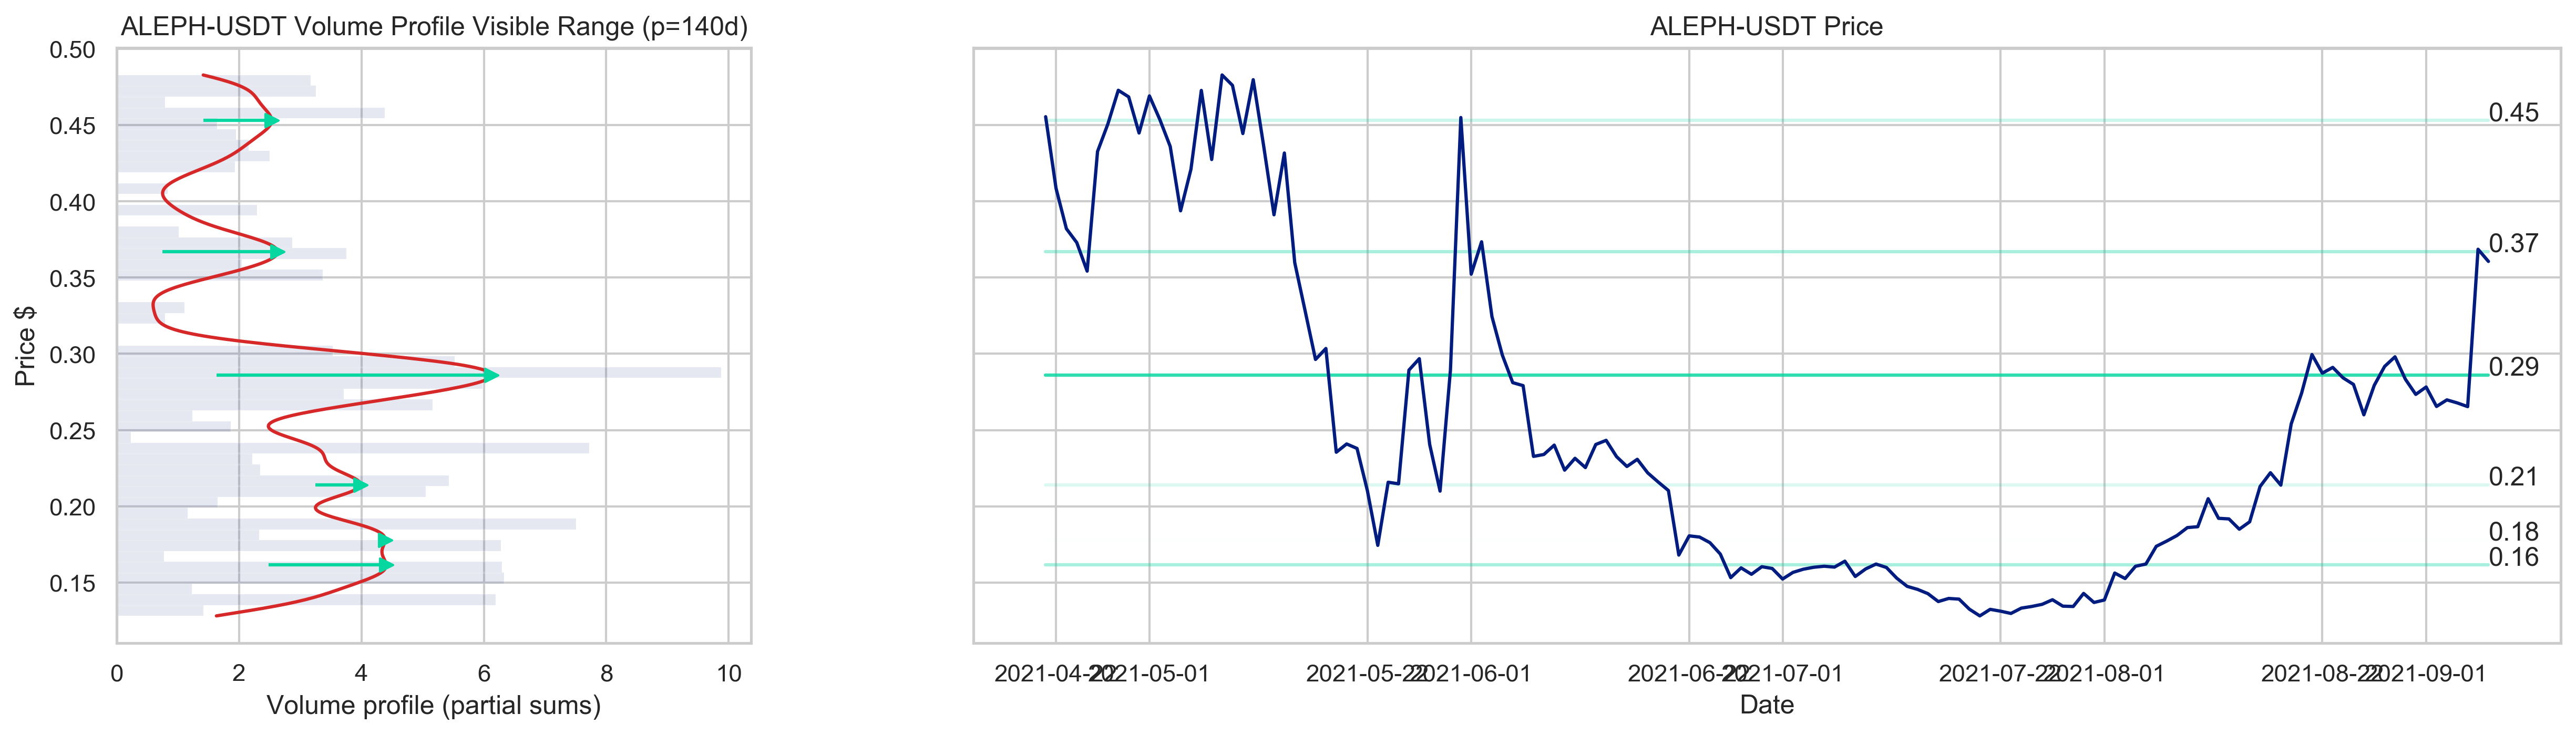

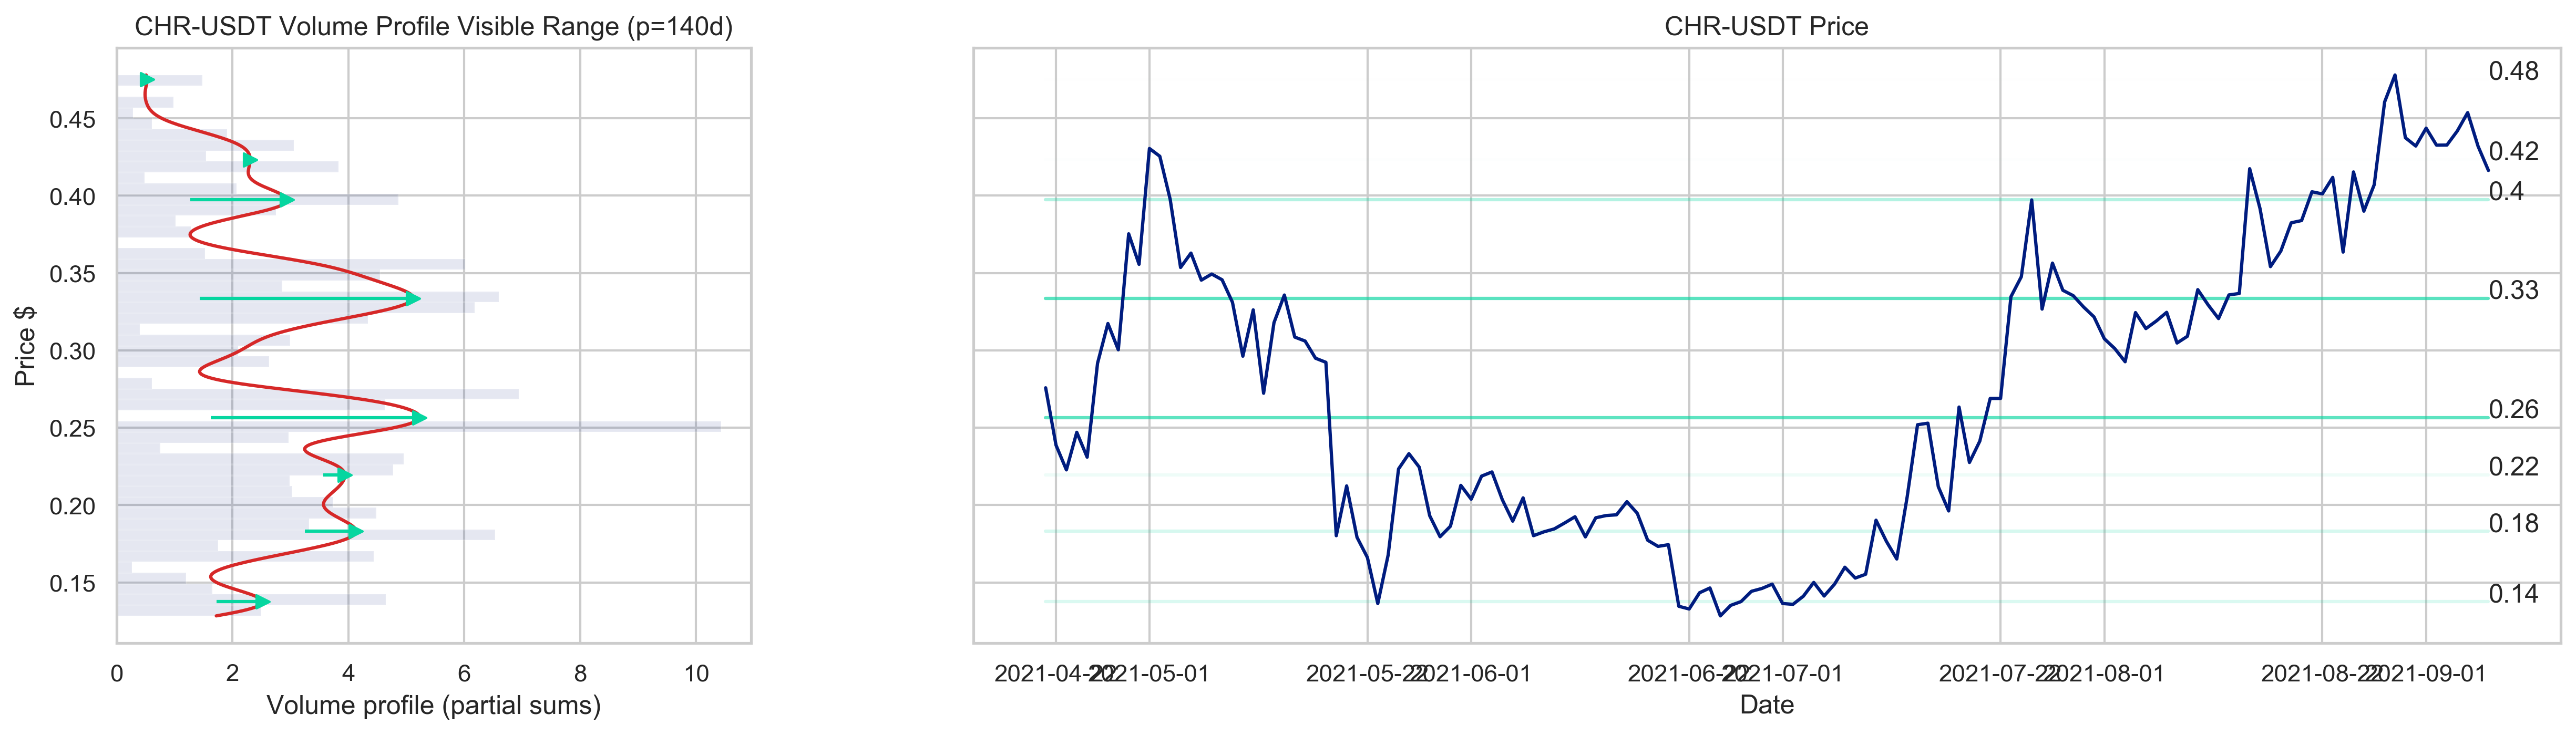

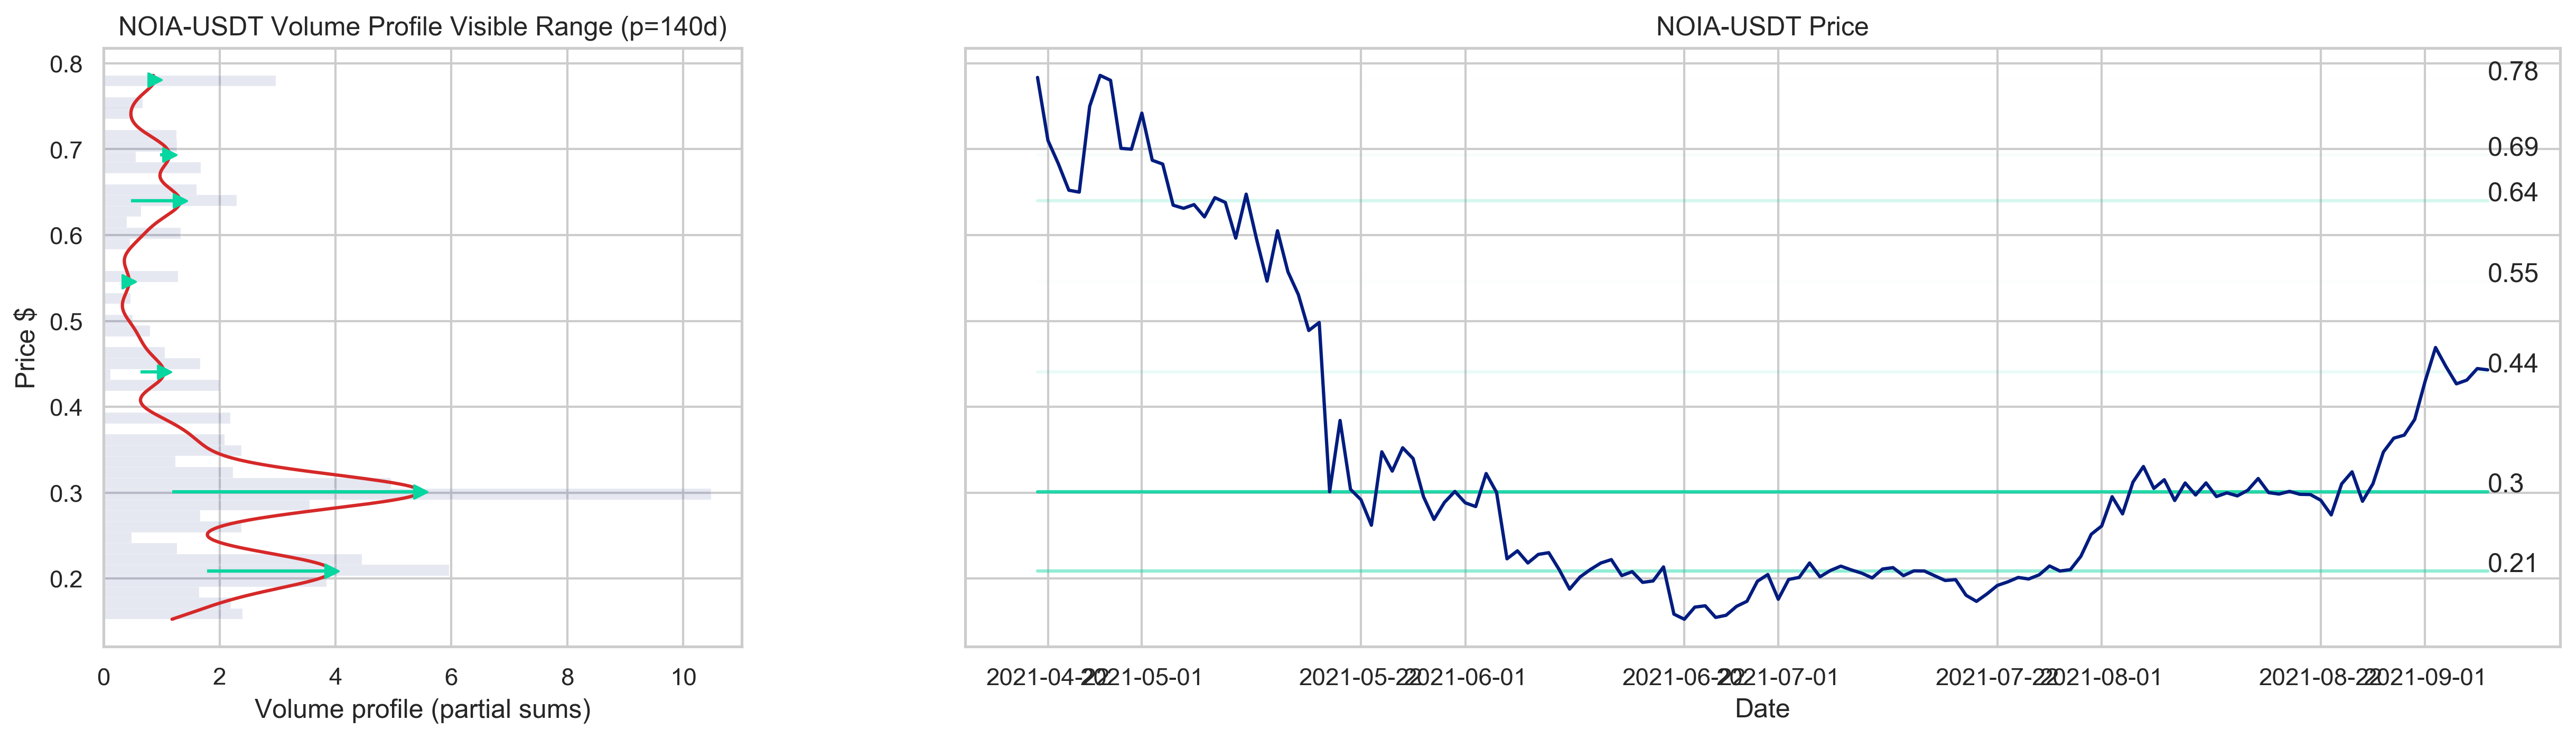

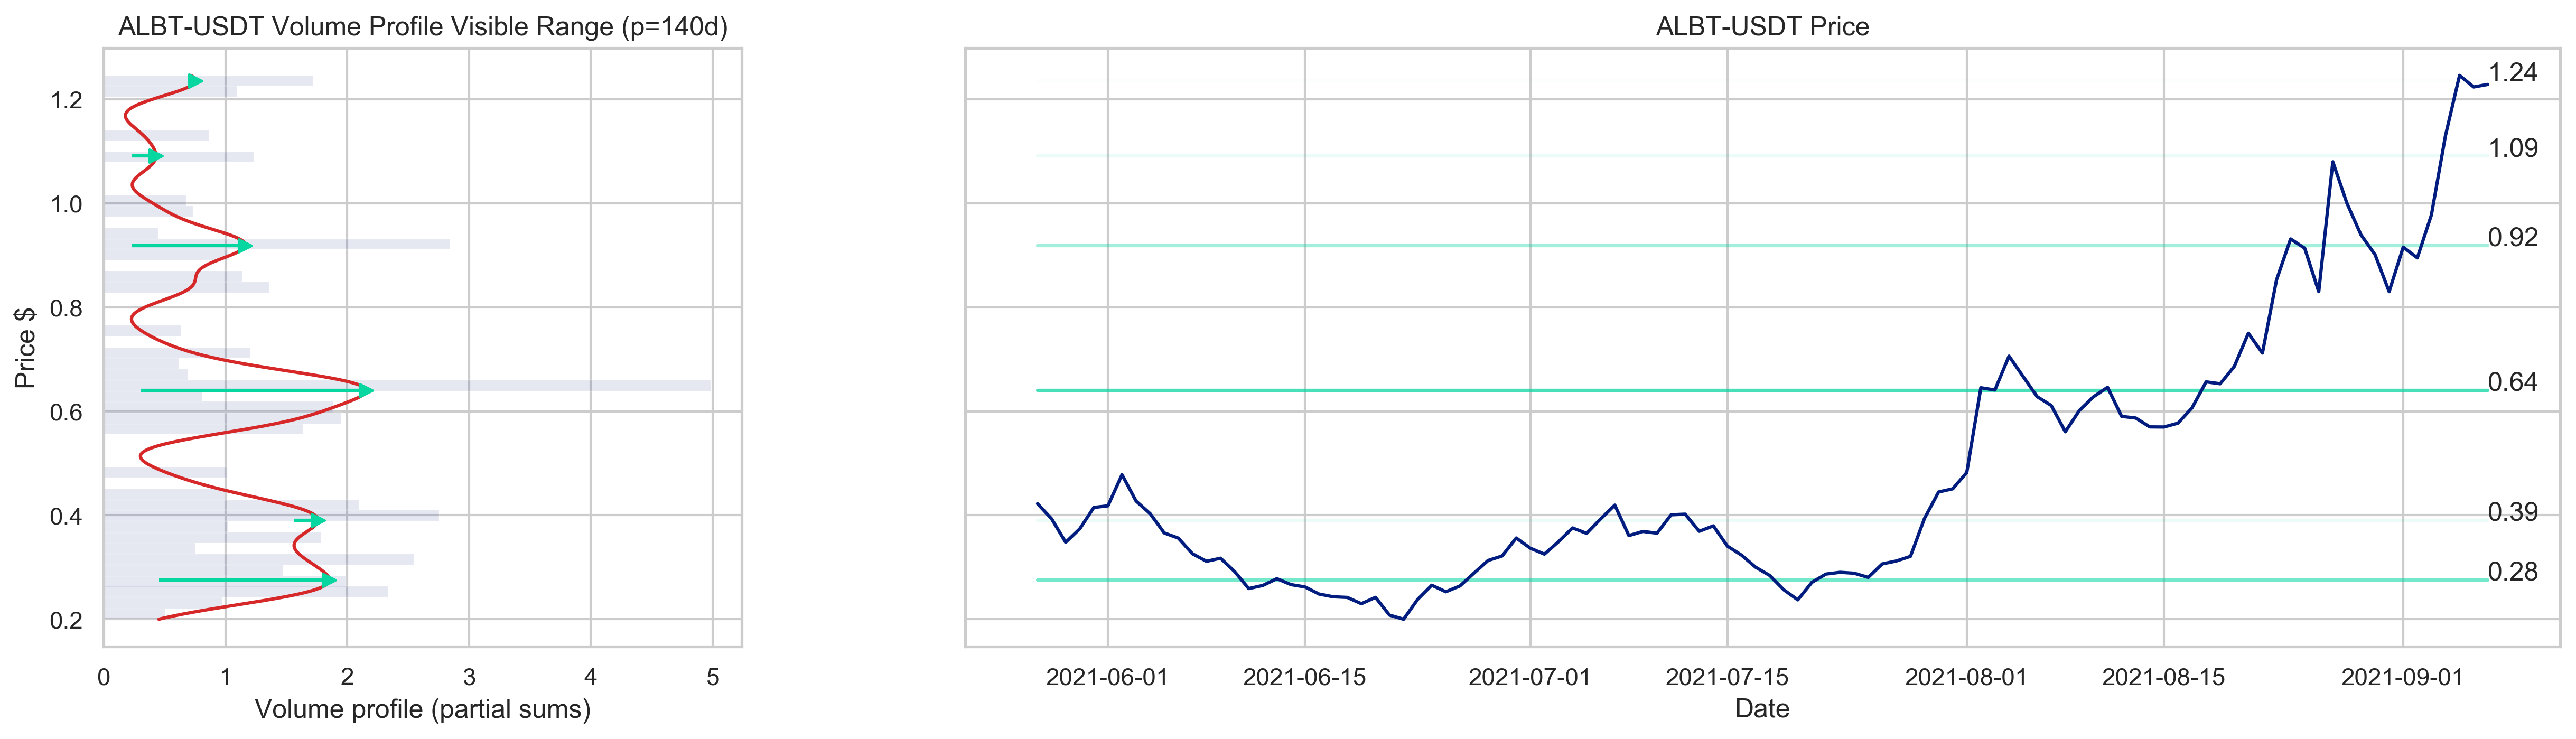

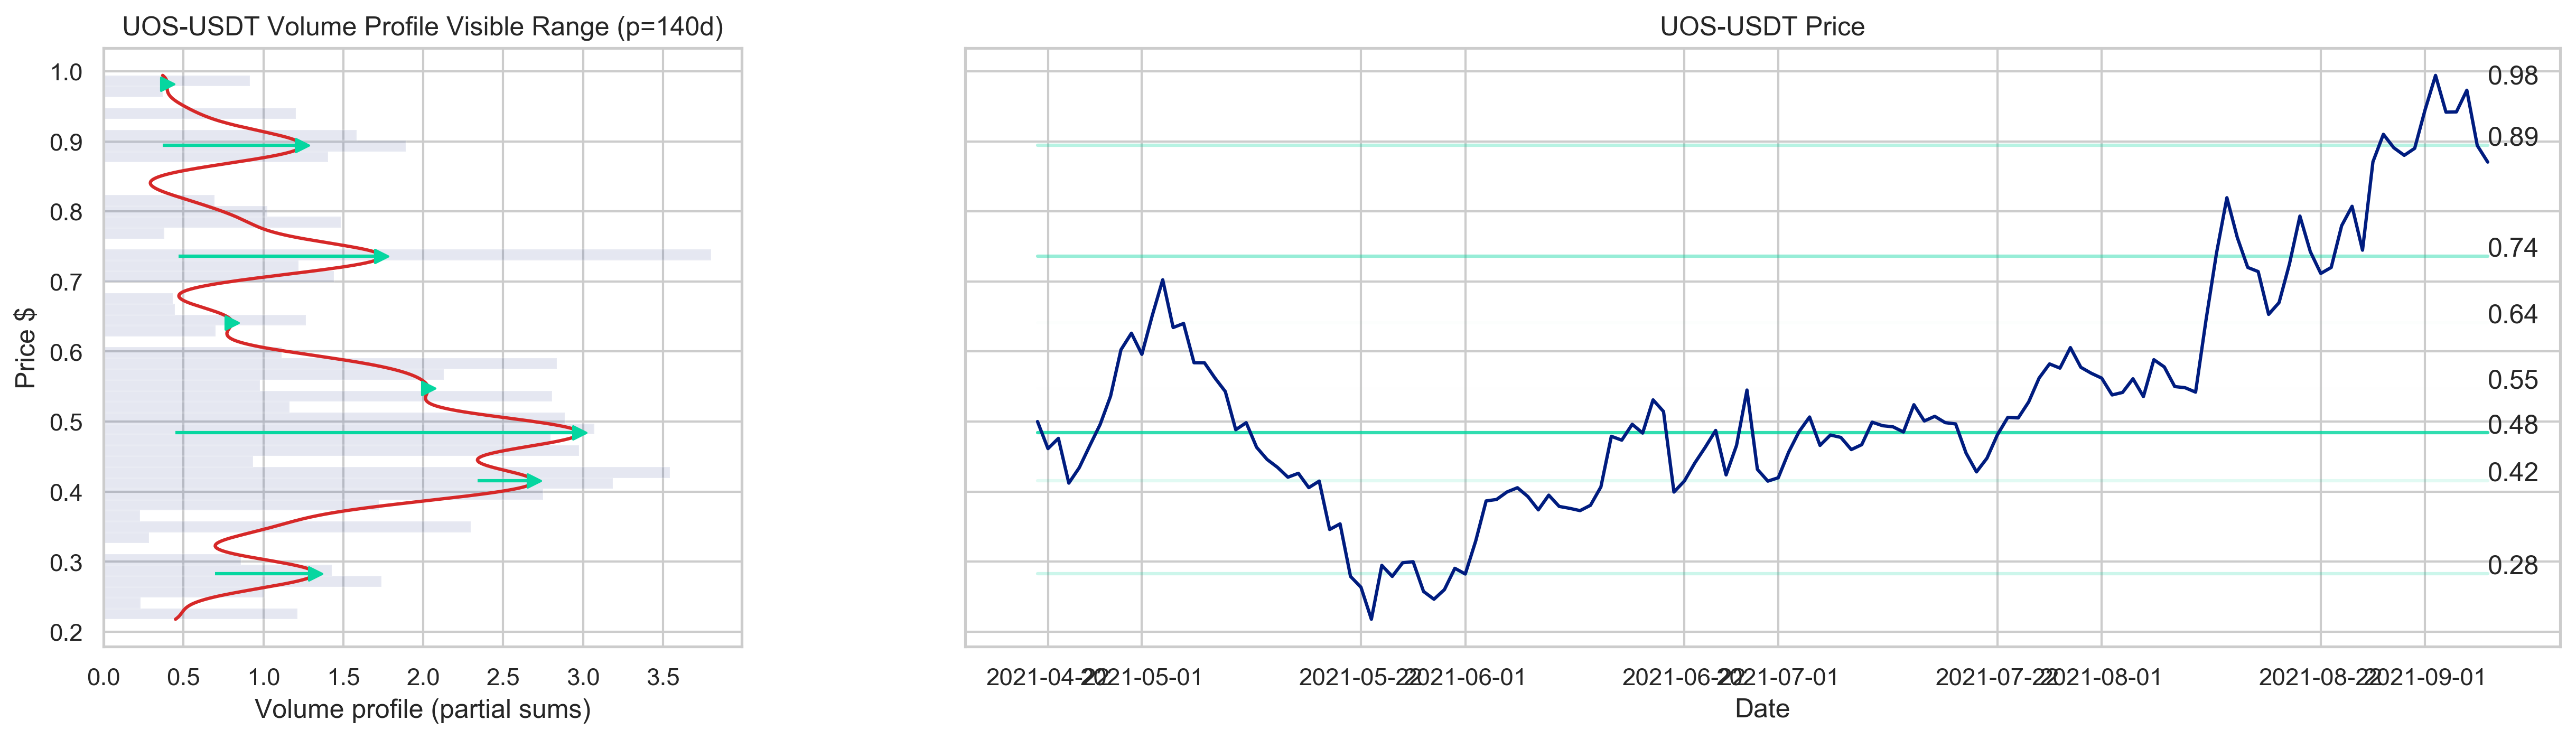

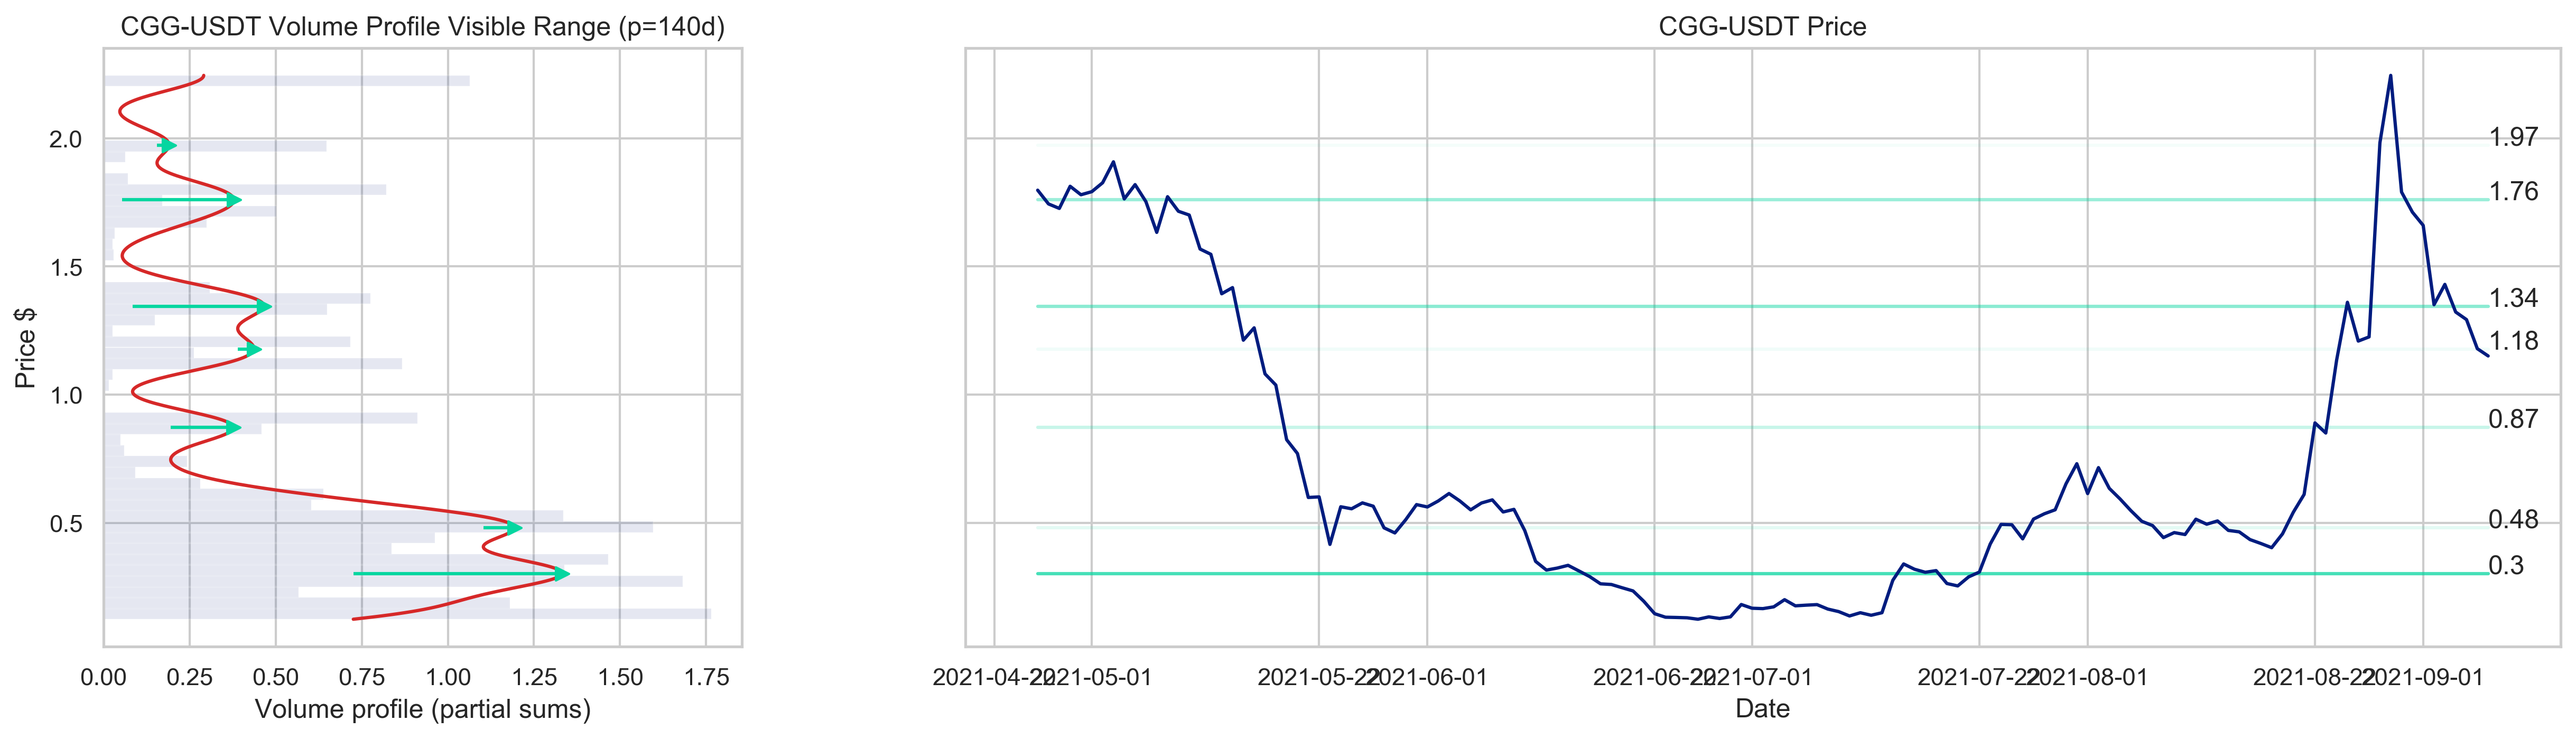

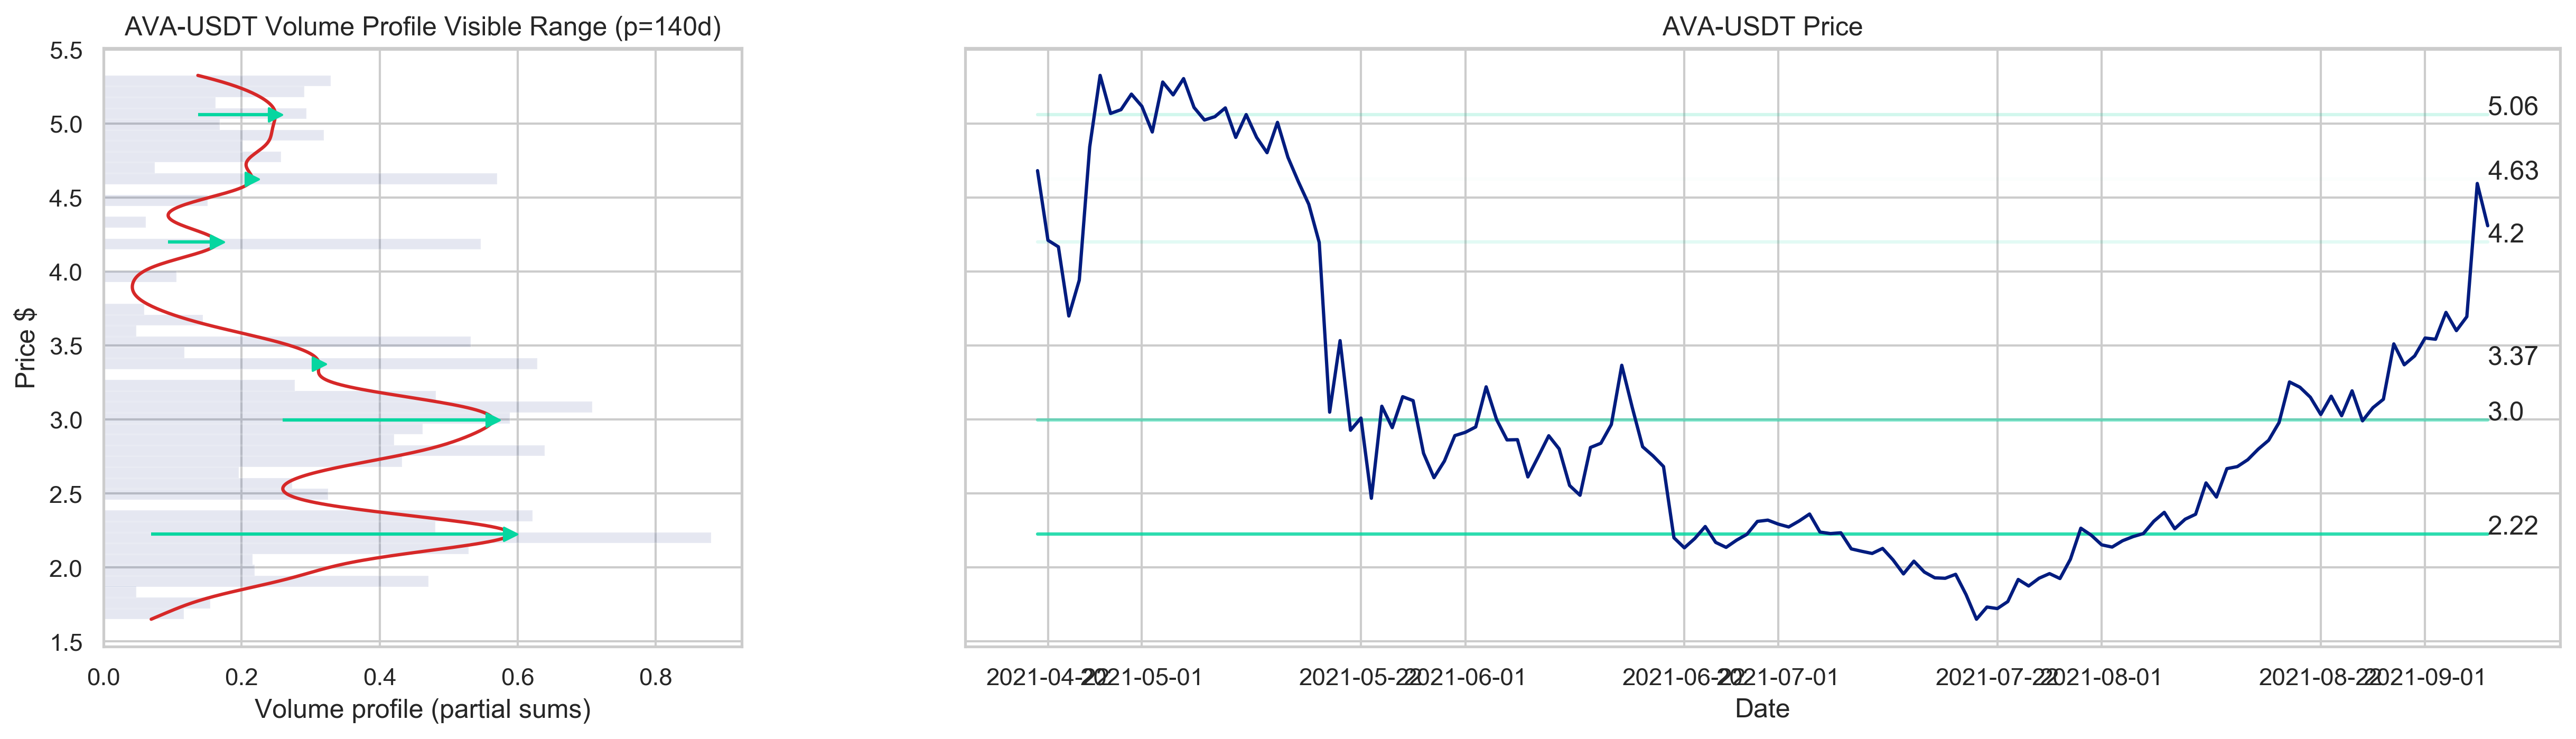

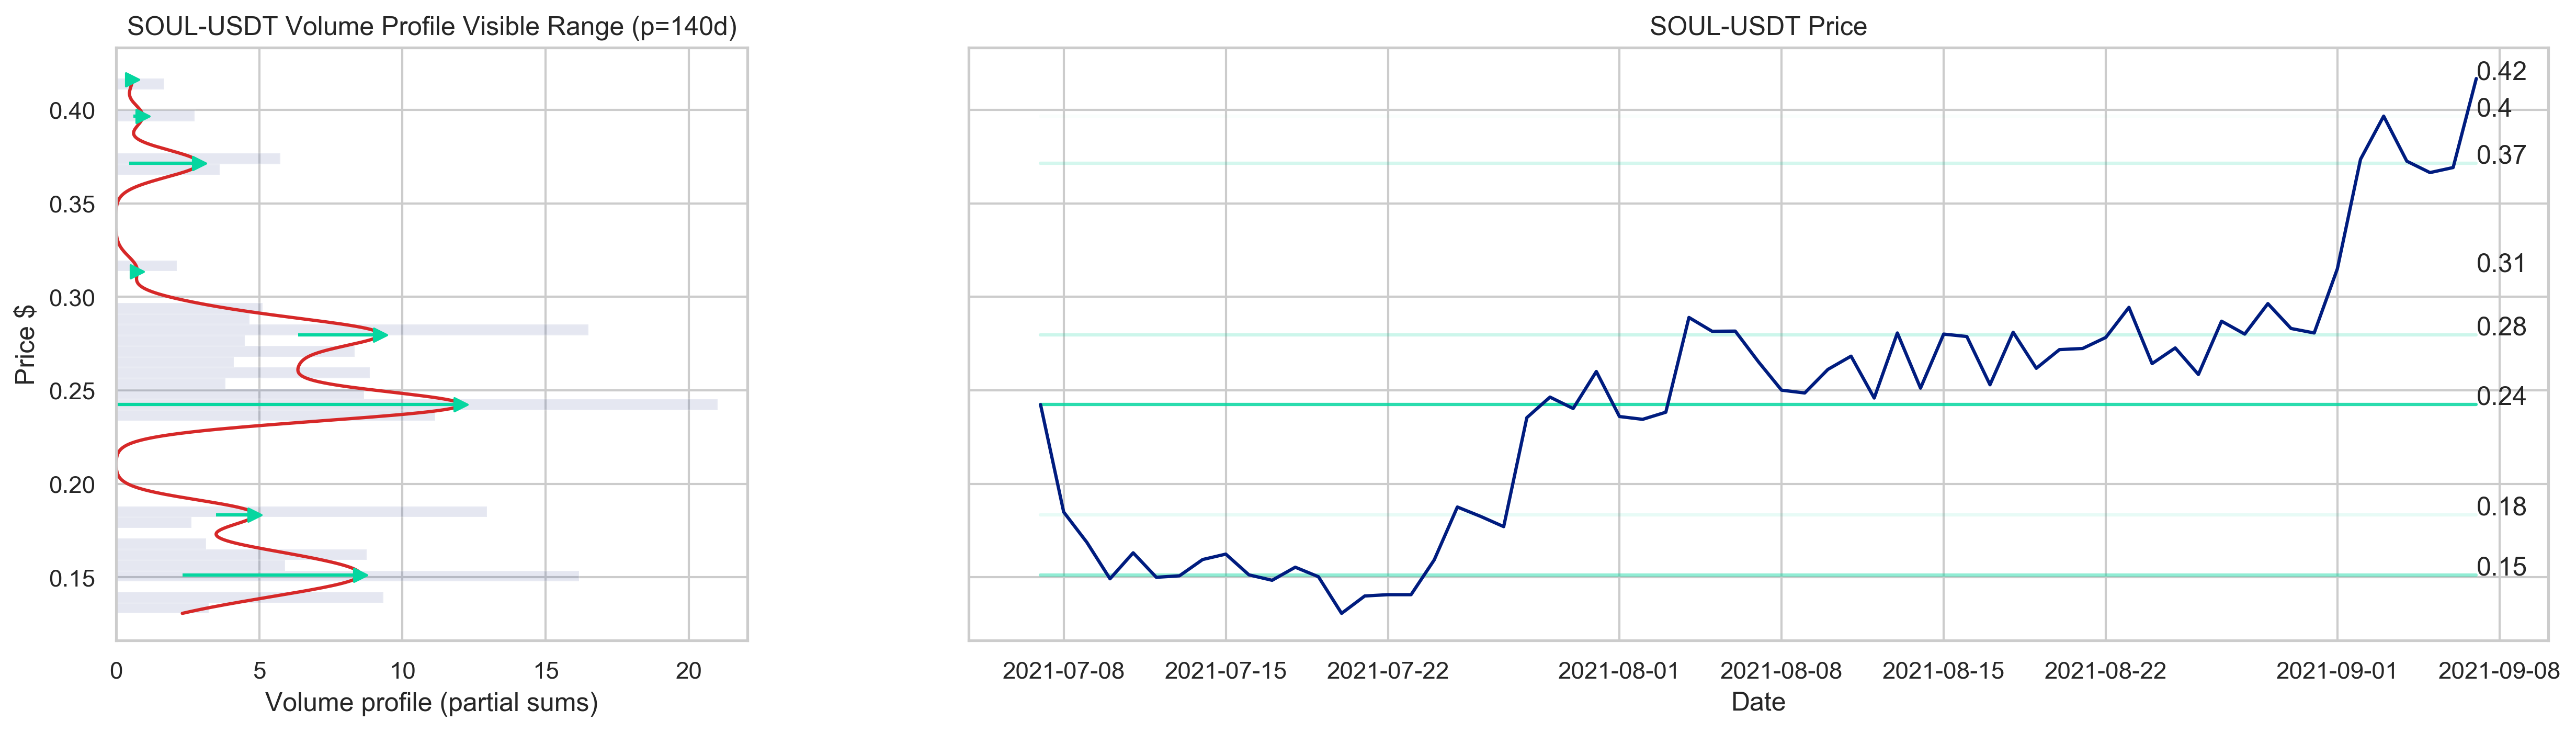

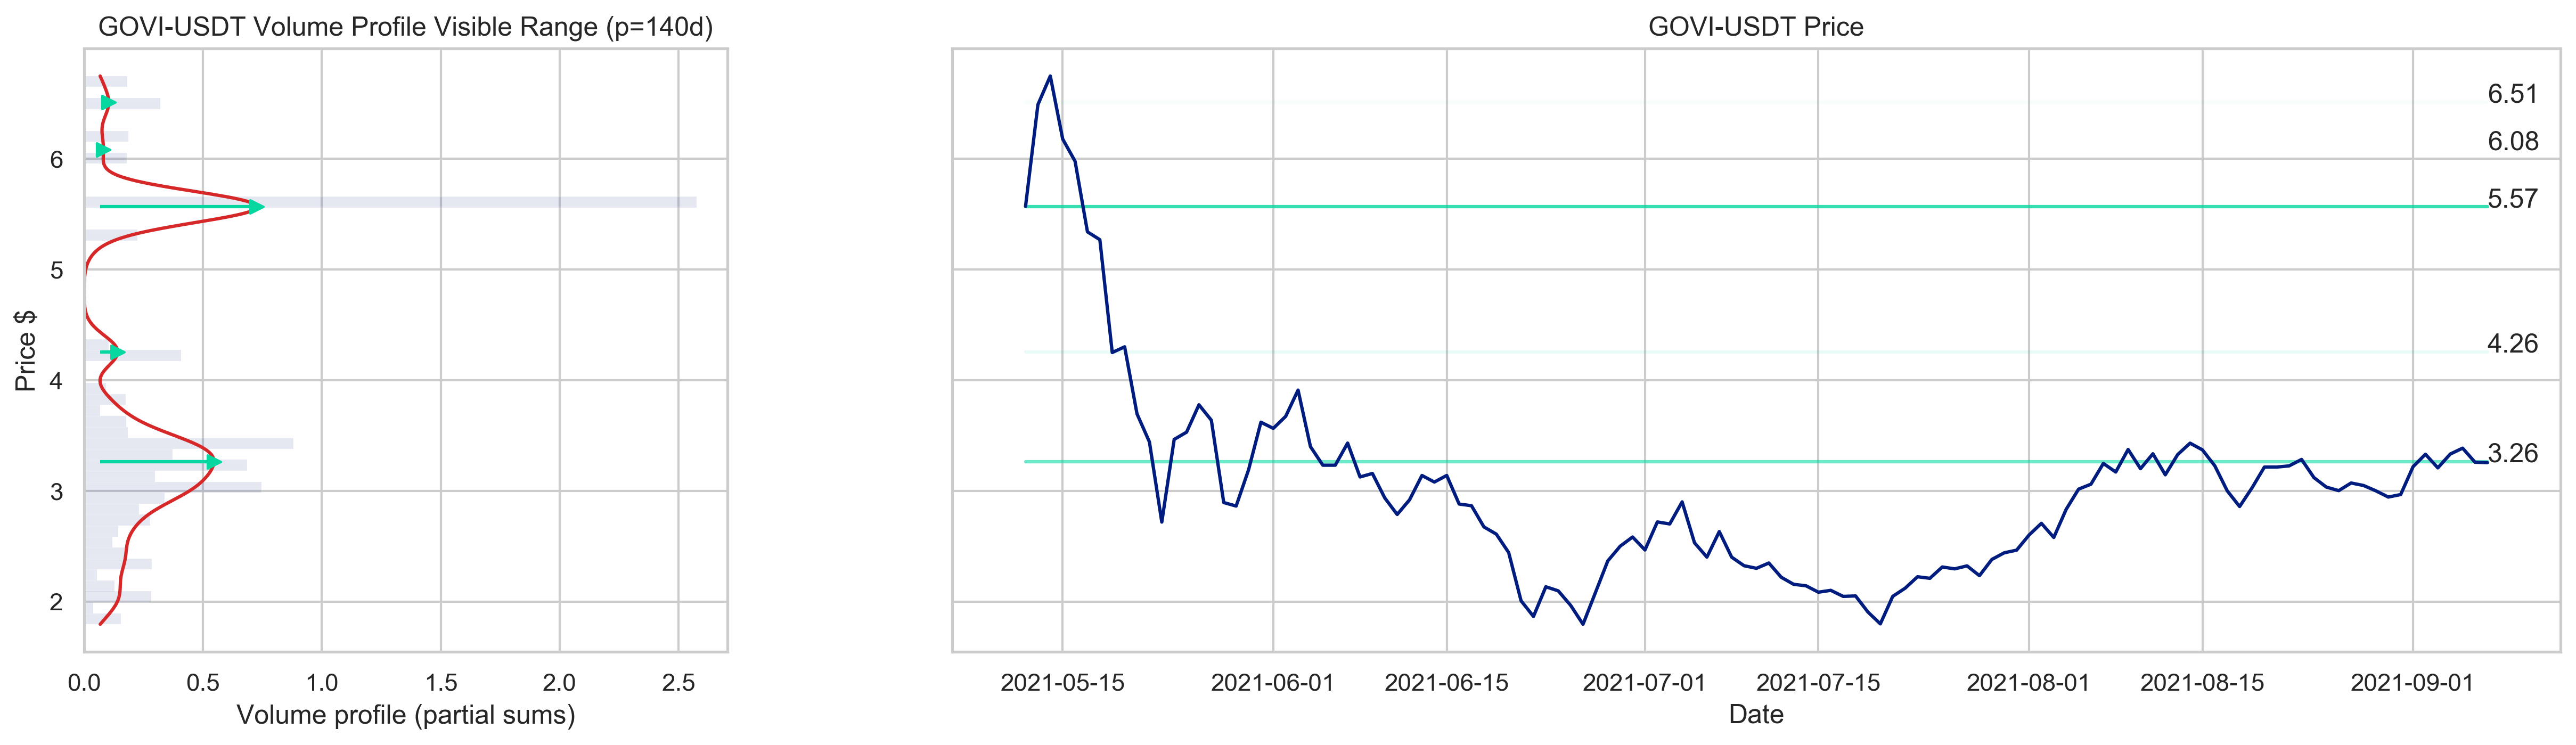

In [6]:
# ticks = ['DAG-USDT','LTX-USDT']
#hide_input
for tick in KT:
  plot(tick, p=140, kk=True)